<a href="https://colab.research.google.com/github/ukishore33/Analysing-cost-of-insurance-claims-post-an-unforeseen-event/blob/main/Insurance_Claims_Unforeseen_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction To Project

For All State, a personal insurance provider in the United States, the project's goal is to create a data science solution.

The goal is to develop a predictive model that can correctly predict the magnitude and expense of insurance claims brought on by unforeseen circumstances.

The requirement to enhance the insurance company's capacity to evaluate and project the potential impact of claims resulting from unforeseen occurrences is central to the problem statement.

 The research uses data science approaches to analyse historical claim data and pertinent contextual data in order to create a model that may predict the severity and cost consequences of future claims.

 Large volumes of structured and unstructured data, such as claim records, policy information, accident details, will be collected and preprocessed as part of the project.

 To uncover significant patterns and relationships from the data, statistical and machine learning approaches will be applied to its analysis and transformation.

 The generated predictive model will be trained using historical data, taking into account numerous elements like the incident's type, its location, the terms of the policy, and any other pertinent variables.

 The model will next be assessed and validated using the proper performance measures to guarantee its reliability and accuracy.

 The project's ultimate goal is to give All State a strong and trustworthy forecasting tool that can help in determining the seriousness and expense of insurance claims after unforeseen incidents.

 Informed judgements can be made, claim management procedures can be optimised, and resources can be distributed wisely, ultimately leading to an improvement in customer satisfaction and overall business performance.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
a=pd.read_csv('train.csv')

In [3]:
a.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
a.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87
188317,587633,B,A,A,B,A,A,A,A,A,...,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460,4751.72


In [5]:
a.shape

(188318, 132)

In [6]:
a.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:
for c in a.columns:
  print('----%s----' % c)
  print(a[c].isnull().sum())

----id----
0
----cat1----
0
----cat2----
0
----cat3----
0
----cat4----
0
----cat5----
0
----cat6----
0
----cat7----
0
----cat8----
0
----cat9----
0
----cat10----
0
----cat11----
0
----cat12----
0
----cat13----
0
----cat14----
0
----cat15----
0
----cat16----
0
----cat17----
0
----cat18----
0
----cat19----
0
----cat20----
0
----cat21----
0
----cat22----
0
----cat23----
0
----cat24----
0
----cat25----
0
----cat26----
0
----cat27----
0
----cat28----
0
----cat29----
0
----cat30----
0
----cat31----
0
----cat32----
0
----cat33----
0
----cat34----
0
----cat35----
0
----cat36----
0
----cat37----
0
----cat38----
0
----cat39----
0
----cat40----
0
----cat41----
0
----cat42----
0
----cat43----
0
----cat44----
0
----cat45----
0
----cat46----
0
----cat47----
0
----cat48----
0
----cat49----
0
----cat50----
0
----cat51----
0
----cat52----
0
----cat53----
0
----cat54----
0
----cat55----
0
----cat56----
0
----cat57----
0
----cat58----
0
----cat59----
0
----cat60----
0
----cat61----
0
----cat62----
0
----

In [8]:
for c in a.columns:
  print('----%s----' % c)
  print(a[c].nunique())

----id----
188318
----cat1----
2
----cat2----
2
----cat3----
2
----cat4----
2
----cat5----
2
----cat6----
2
----cat7----
2
----cat8----
2
----cat9----
2
----cat10----
2
----cat11----
2
----cat12----
2
----cat13----
2
----cat14----
2
----cat15----
2
----cat16----
2
----cat17----
2
----cat18----
2
----cat19----
2
----cat20----
2
----cat21----
2
----cat22----
2
----cat23----
2
----cat24----
2
----cat25----
2
----cat26----
2
----cat27----
2
----cat28----
2
----cat29----
2
----cat30----
2
----cat31----
2
----cat32----
2
----cat33----
2
----cat34----
2
----cat35----
2
----cat36----
2
----cat37----
2
----cat38----
2
----cat39----
2
----cat40----
2
----cat41----
2
----cat42----
2
----cat43----
2
----cat44----
2
----cat45----
2
----cat46----
2
----cat47----
2
----cat48----
2
----cat49----
2
----cat50----
2
----cat51----
2
----cat52----
2
----cat53----
2
----cat54----
2
----cat55----
2
----cat56----
2
----cat57----
2
----cat58----
2
----cat59----
2
----cat60----
2
----cat61----
2
----cat62----
2

In [9]:
b=pd.read_csv('test.csv')

In [10]:
b.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [11]:
b.tail()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
125541,587617,A,A,A,B,A,A,A,A,A,...,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
125542,587621,A,A,A,A,B,B,A,B,A,...,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
125543,587627,B,B,A,A,B,A,A,A,B,...,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125
125544,587629,A,A,A,A,A,B,A,B,A,...,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542
125545,587634,A,B,A,A,A,A,A,A,B,...,0.413817,0.221699,0.242044,0.25461,0.31399,0.25183,0.245410,0.241676,0.287682,0.220323


In [12]:
b.shape

(125546, 131)

In [13]:
b.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000
mean,294067.153442,0.494447,0.506939,0.498255,0.492334,0.487640,0.492188,0.485945,0.487401,0.486015,0.498909,0.494360,0.494033,0.495086,0.495586
std,170098.335649,0.187961,0.206837,0.201746,0.210815,0.209119,0.205574,0.178650,0.199549,0.182134,0.185950,0.210399,0.210148,0.213108,0.222613
min,4.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.178568
25%,146414.250000,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.352087,0.317960,0.358970,0.364580,0.310961,0.318249,0.315758,0.294752
50%,294306.000000,0.475784,0.555782,0.527991,0.452887,0.422268,0.441525,0.438893,0.441060,0.441450,0.466720,0.457203,0.462286,0.363547,0.406104
75%,441800.000000,0.626630,0.681761,0.634224,0.652072,0.643315,0.659261,0.591284,0.629180,0.568890,0.619840,0.678924,0.682413,0.689974,0.724791
max,587634.000000,0.984975,0.862654,0.944251,0.956046,0.983107,0.997162,1.000000,0.982800,0.995400,0.994980,0.997830,0.997416,0.988494,0.844814


In [14]:
for c in b.columns:
  print('----%s----' % c)
  print(b[c].isnull().sum())

----id----
0
----cat1----
0
----cat2----
0
----cat3----
0
----cat4----
0
----cat5----
0
----cat6----
0
----cat7----
0
----cat8----
0
----cat9----
0
----cat10----
0
----cat11----
0
----cat12----
0
----cat13----
0
----cat14----
0
----cat15----
0
----cat16----
0
----cat17----
0
----cat18----
0
----cat19----
0
----cat20----
0
----cat21----
0
----cat22----
0
----cat23----
0
----cat24----
0
----cat25----
0
----cat26----
0
----cat27----
0
----cat28----
0
----cat29----
0
----cat30----
0
----cat31----
0
----cat32----
0
----cat33----
0
----cat34----
0
----cat35----
0
----cat36----
0
----cat37----
0
----cat38----
0
----cat39----
0
----cat40----
0
----cat41----
0
----cat42----
0
----cat43----
0
----cat44----
0
----cat45----
0
----cat46----
0
----cat47----
0
----cat48----
0
----cat49----
0
----cat50----
0
----cat51----
0
----cat52----
0
----cat53----
0
----cat54----
0
----cat55----
0
----cat56----
0
----cat57----
0
----cat58----
0
----cat59----
0
----cat60----
0
----cat61----
0
----cat62----
0
----

In [15]:
for c in b.columns:
  print('----%s----' % c)
  print(b[c].nunique())

----id----
125546
----cat1----
2
----cat2----
2
----cat3----
2
----cat4----
2
----cat5----
2
----cat6----
2
----cat7----
2
----cat8----
2
----cat9----
2
----cat10----
2
----cat11----
2
----cat12----
2
----cat13----
2
----cat14----
2
----cat15----
2
----cat16----
2
----cat17----
2
----cat18----
2
----cat19----
2
----cat20----
2
----cat21----
2
----cat22----
2
----cat23----
2
----cat24----
2
----cat25----
2
----cat26----
2
----cat27----
2
----cat28----
2
----cat29----
2
----cat30----
2
----cat31----
2
----cat32----
2
----cat33----
2
----cat34----
2
----cat35----
2
----cat36----
2
----cat37----
2
----cat38----
2
----cat39----
2
----cat40----
2
----cat41----
2
----cat42----
2
----cat43----
2
----cat44----
2
----cat45----
2
----cat46----
2
----cat47----
2
----cat48----
2
----cat49----
2
----cat50----
2
----cat51----
2
----cat52----
2
----cat53----
2
----cat54----
2
----cat55----
2
----cat56----
2
----cat57----
2
----cat58----
2
----cat59----
2
----cat60----
2
----cat61----
2
----cat62----
2

- As we can see that the data cleaning part of this data science project already done as there are no null values, no duplicates, etc., we can directly move on to Feauture engineering part and after that Machine Learning Steps.

#### EDA

Firstly we can start with univariate analysis of every column.

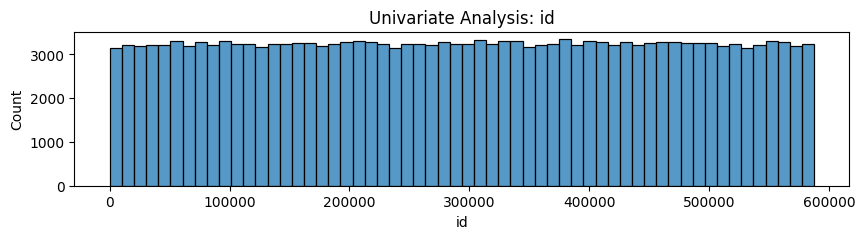

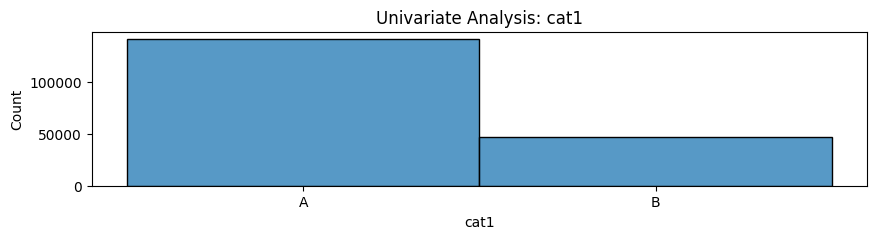

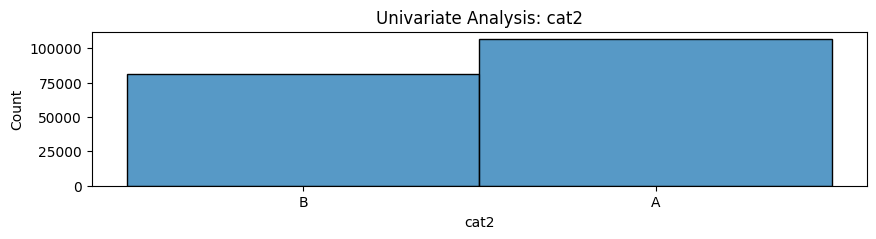

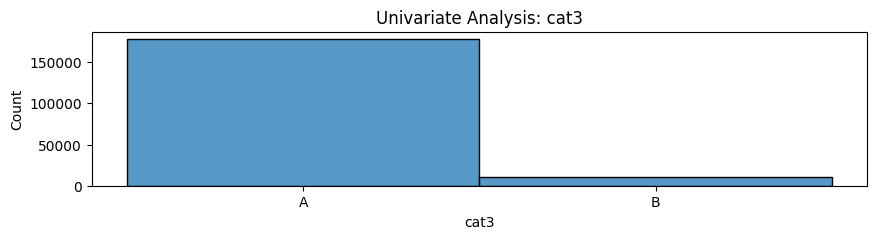

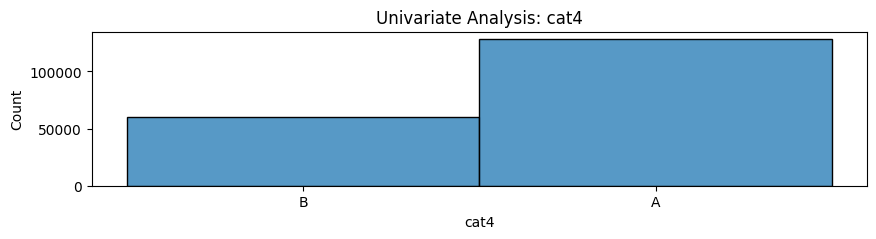

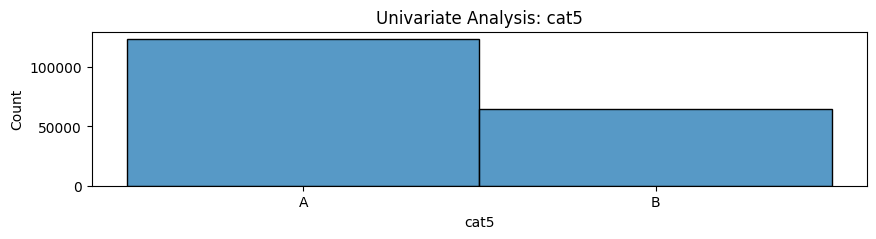

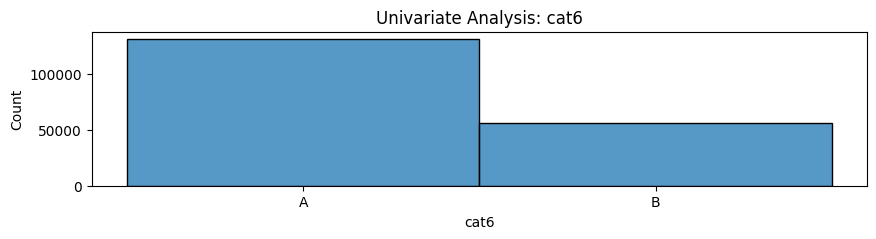

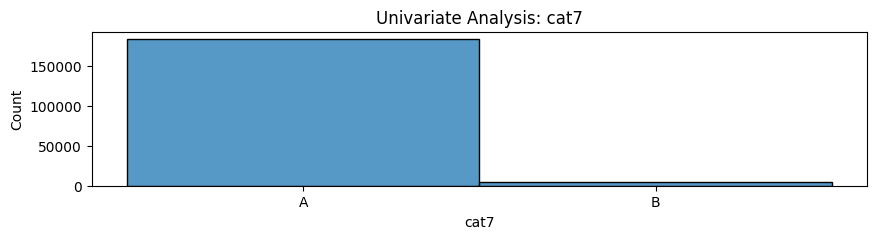

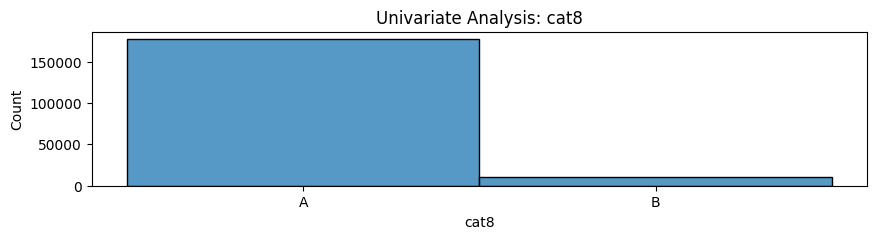

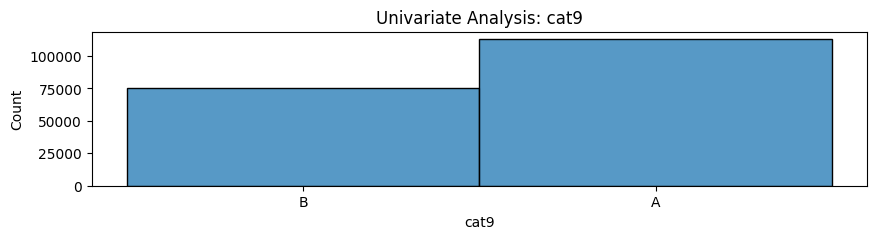

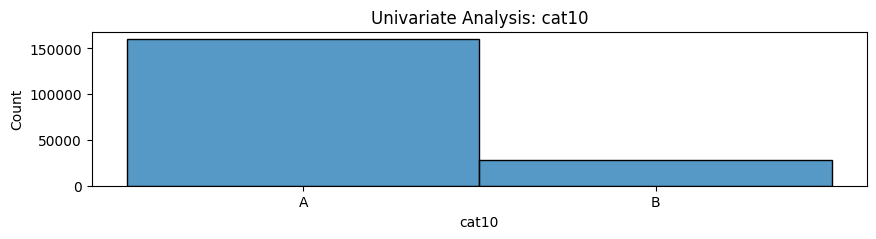

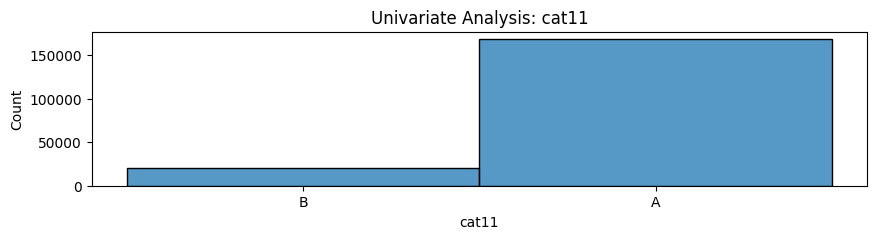

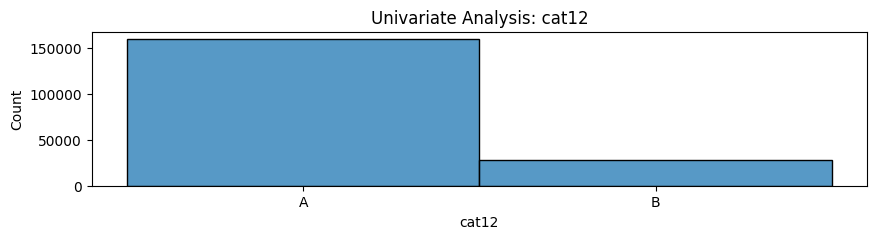

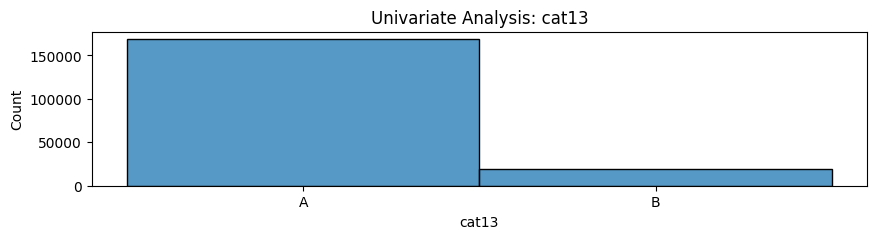

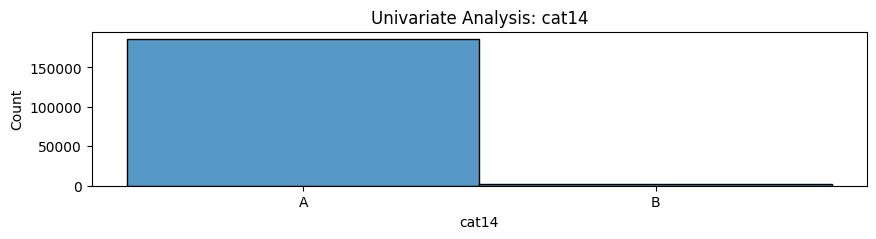

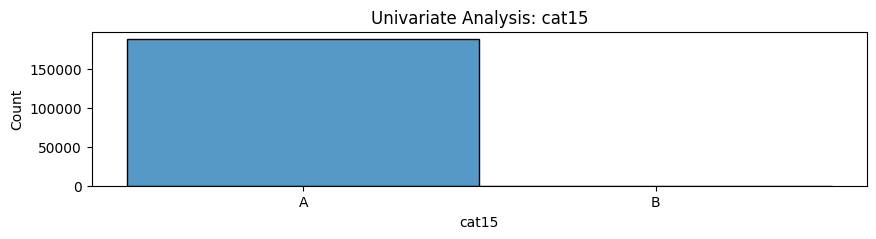

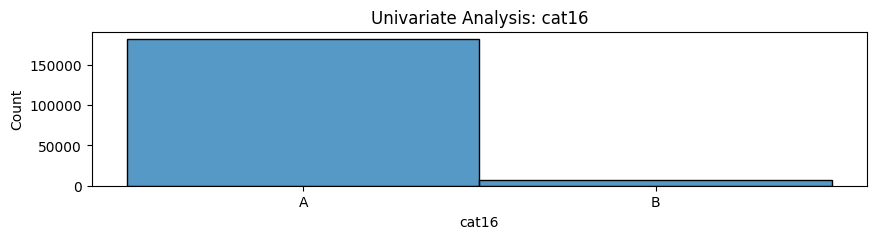

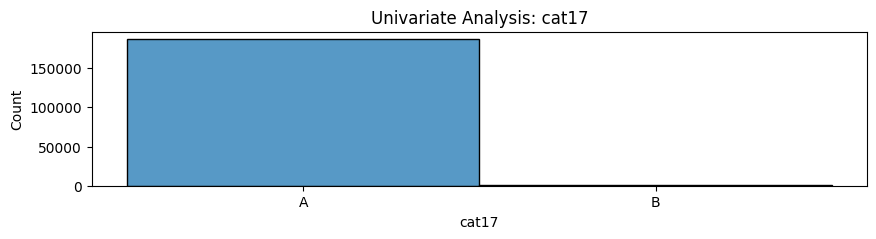

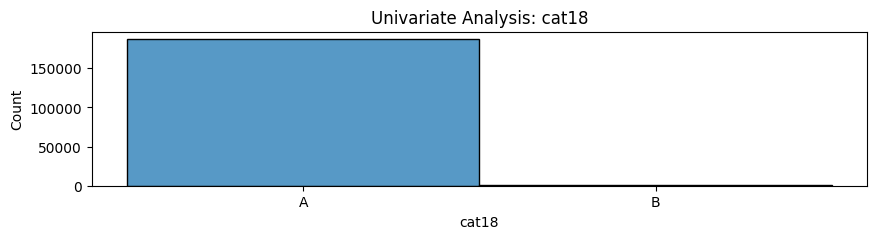

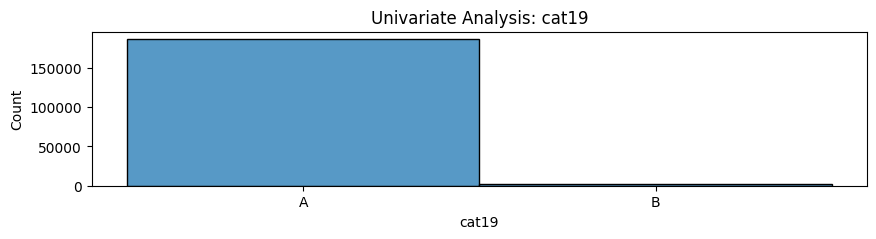

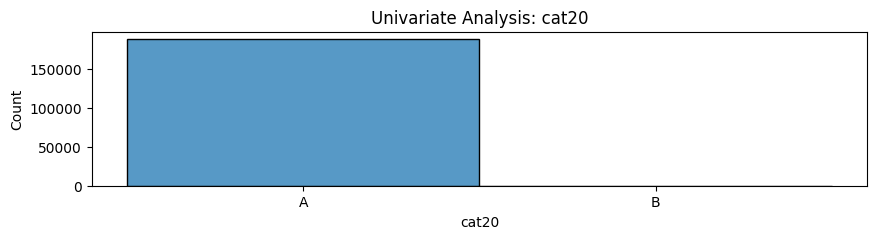

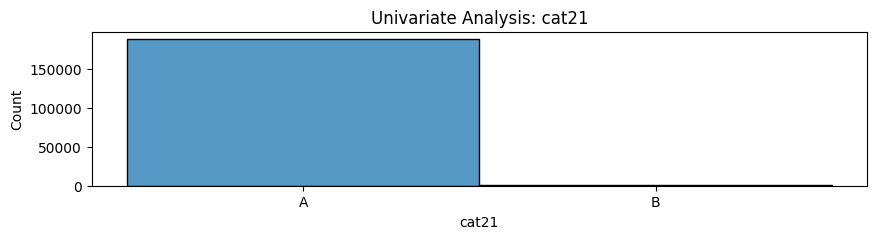

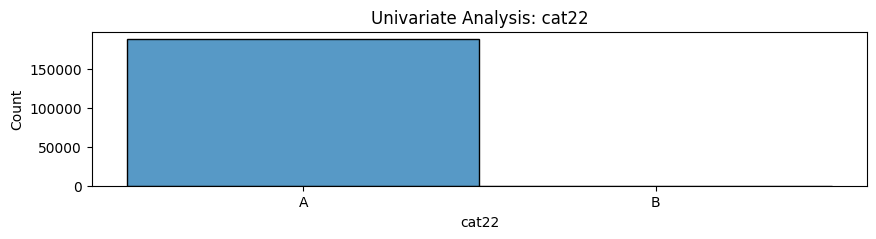

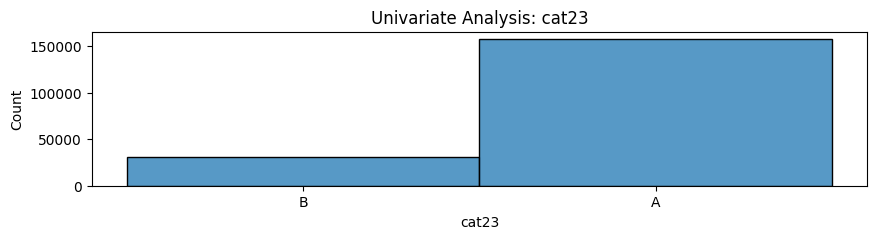

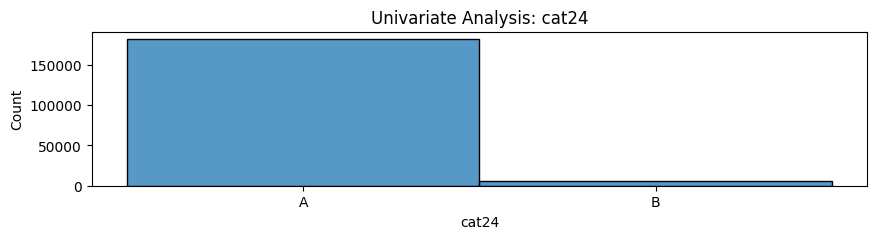

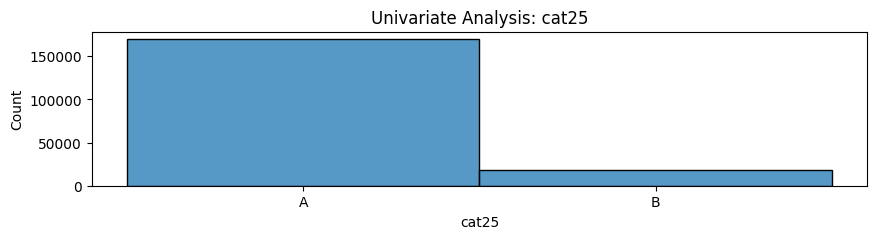

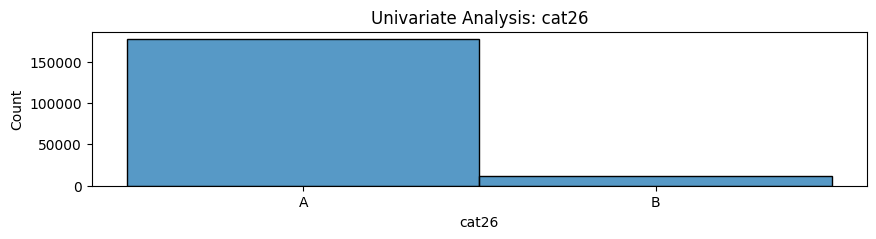

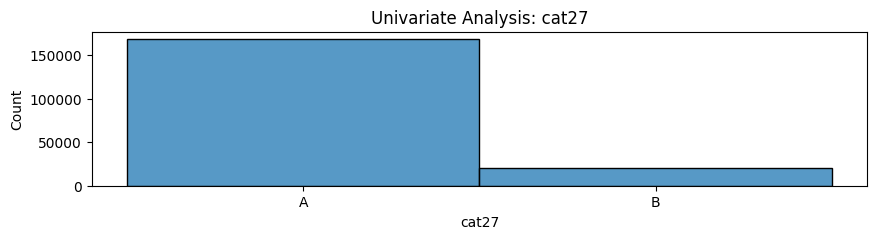

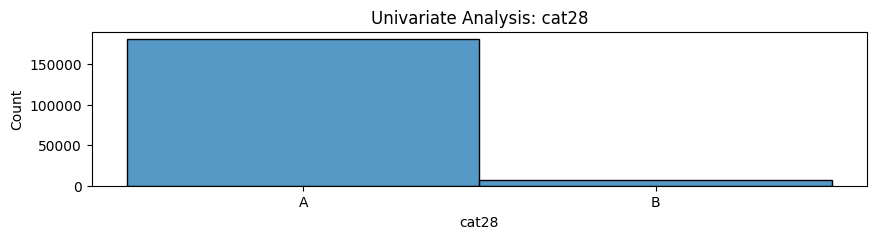

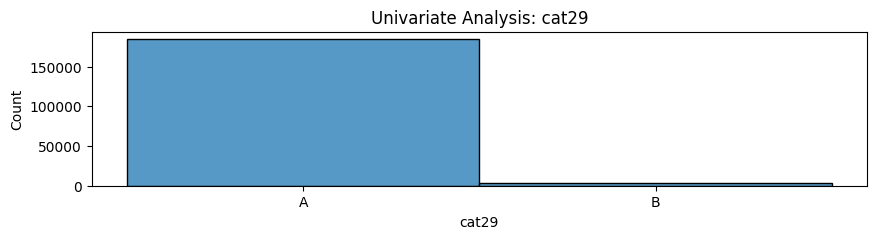

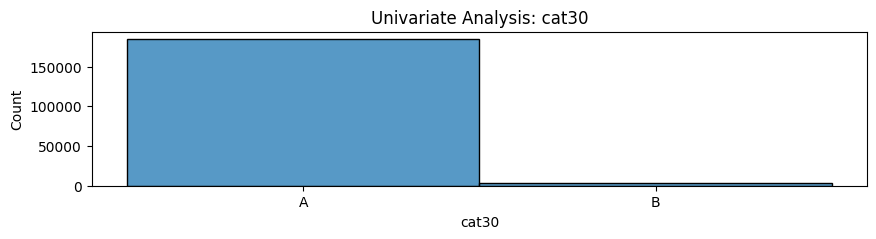

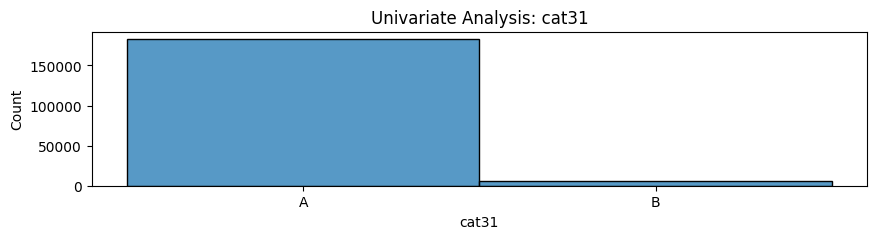

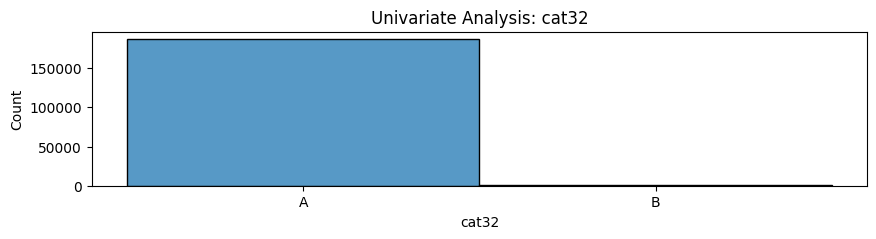

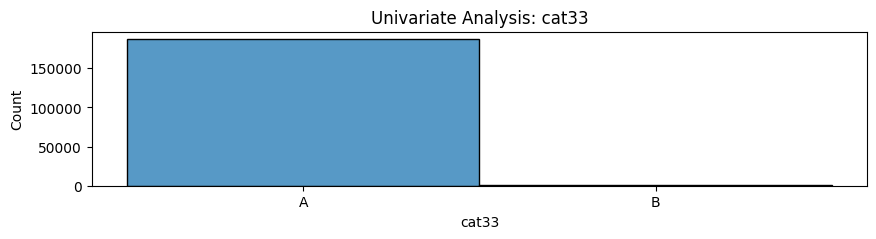

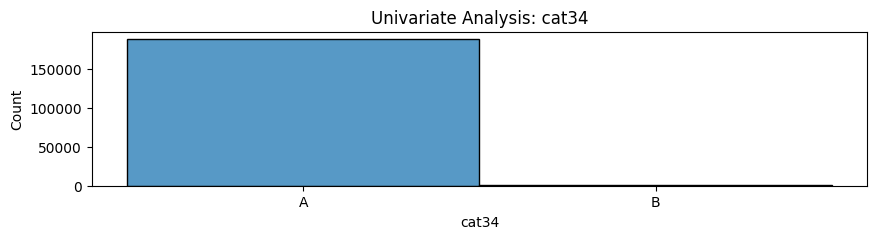

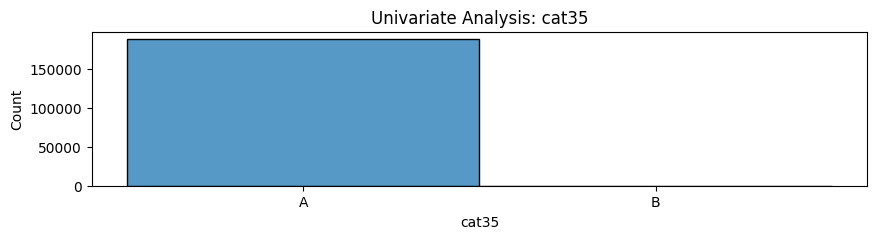

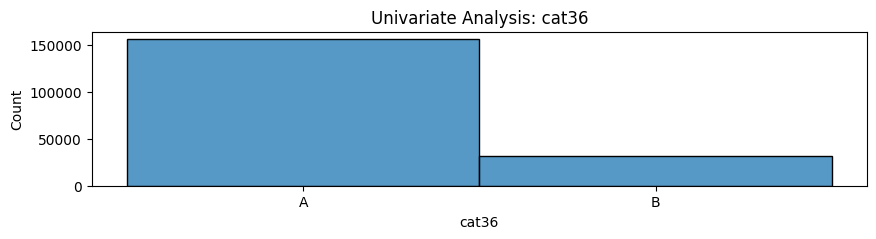

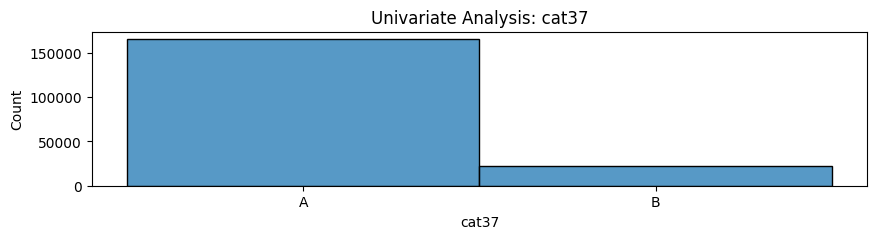

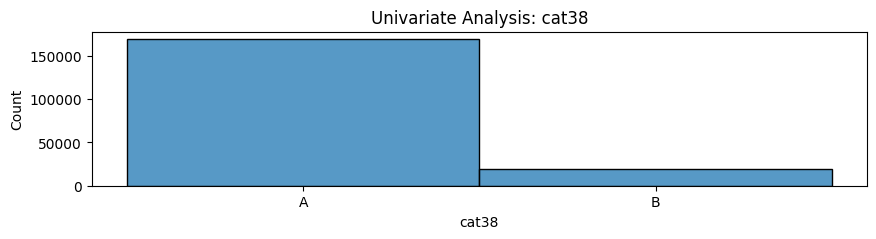

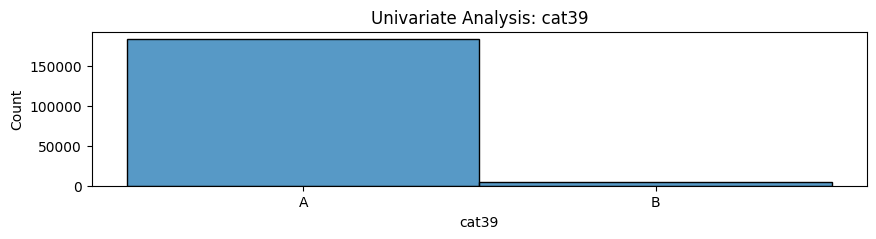

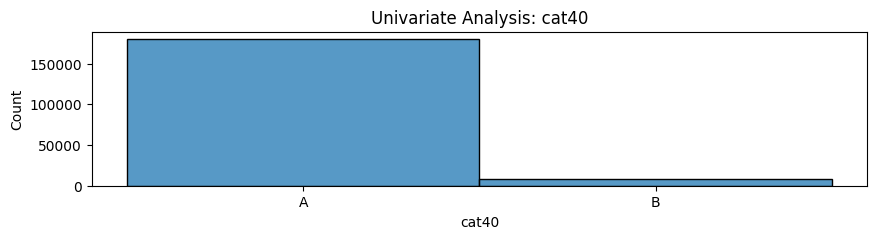

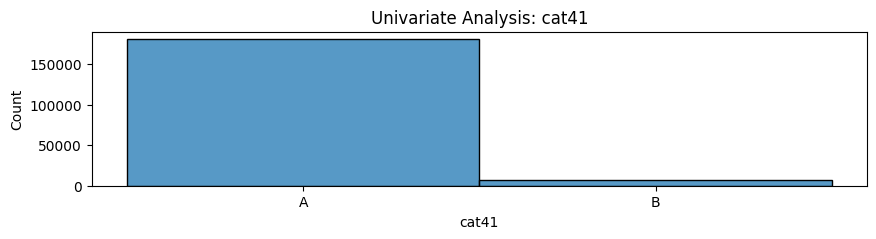

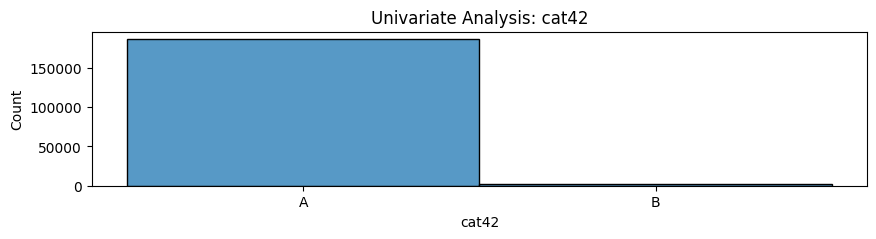

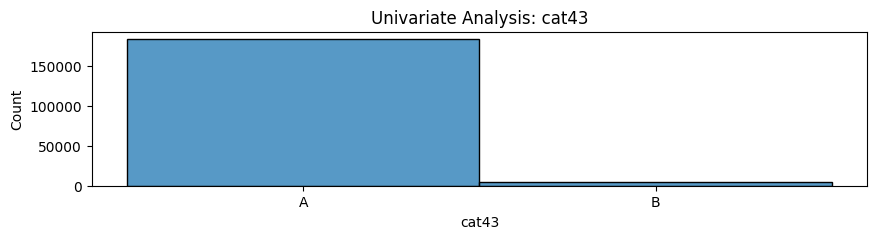

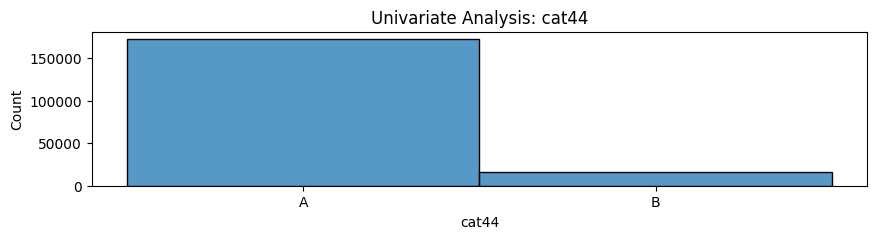

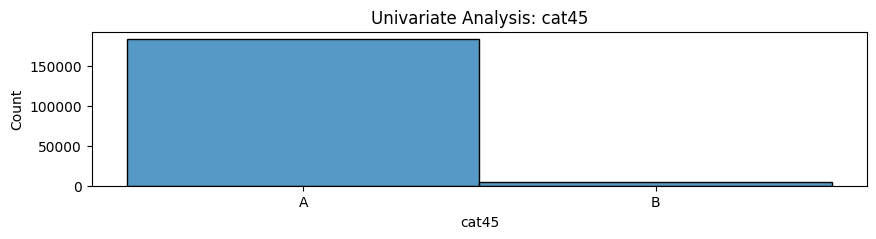

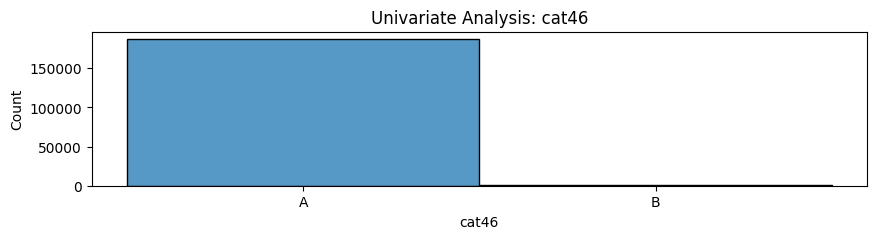

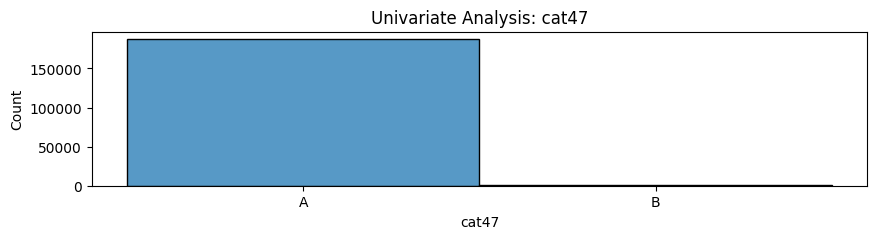

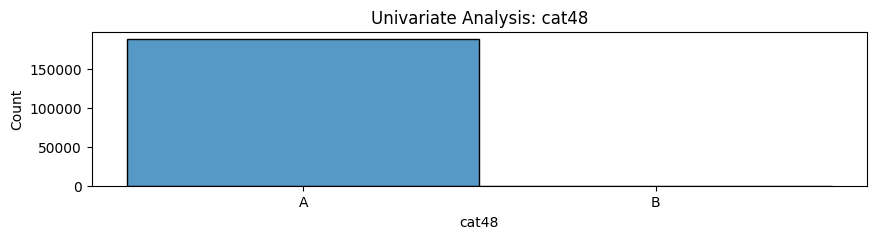

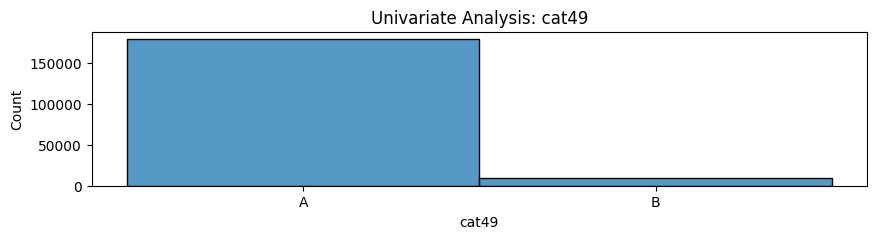

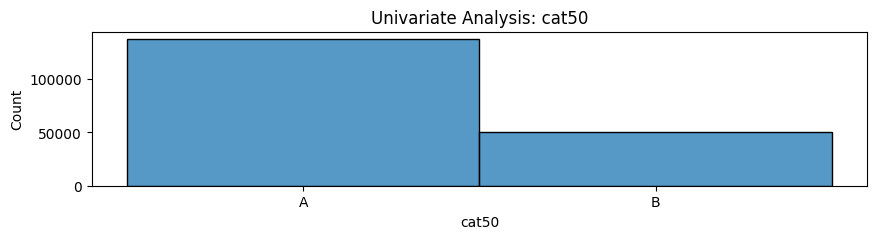

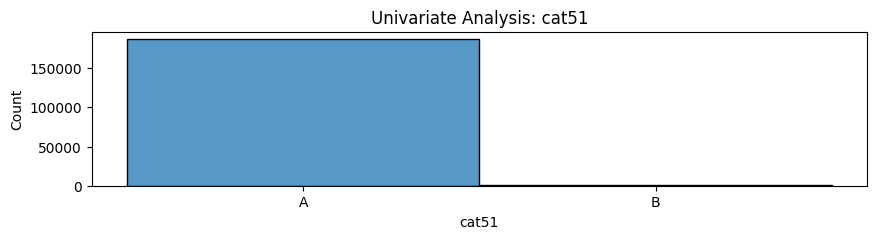

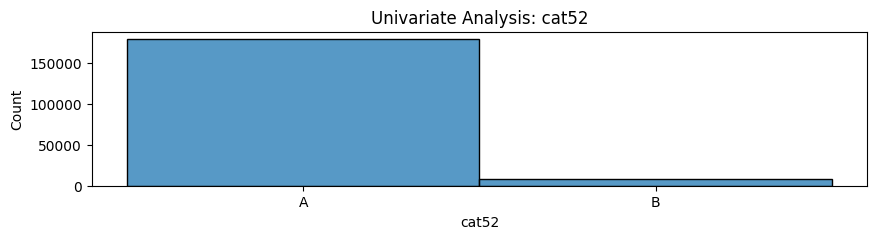

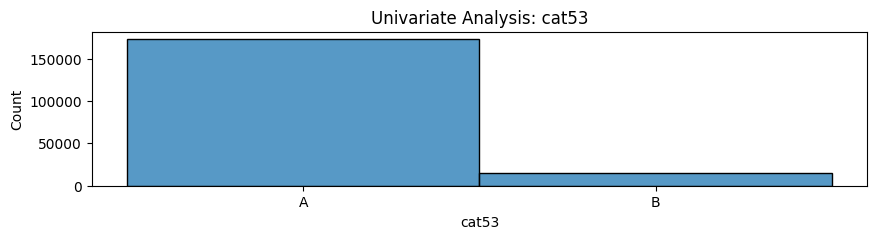

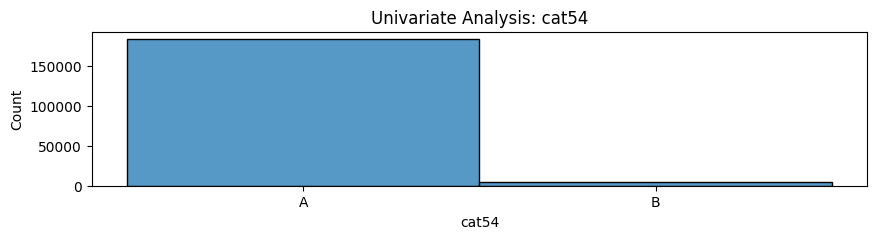

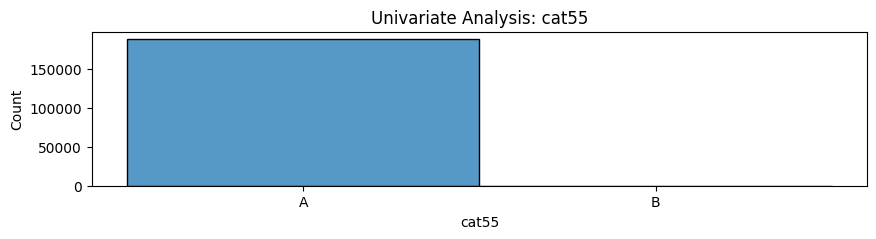

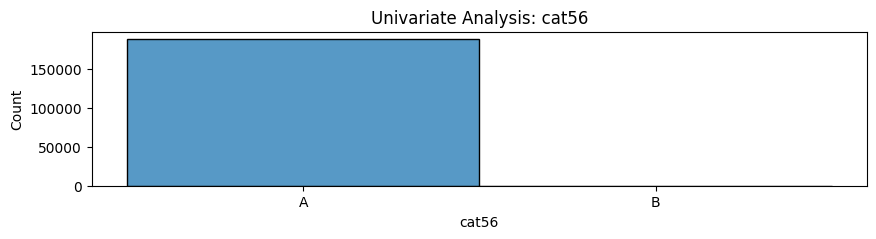

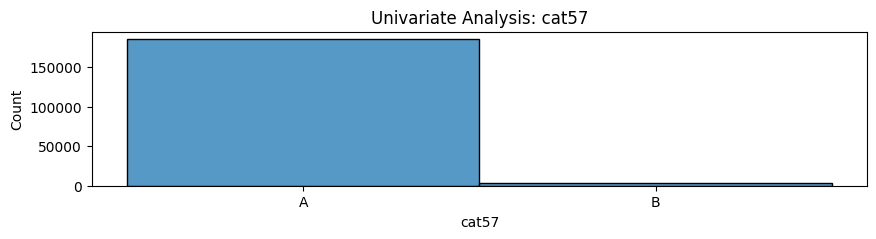

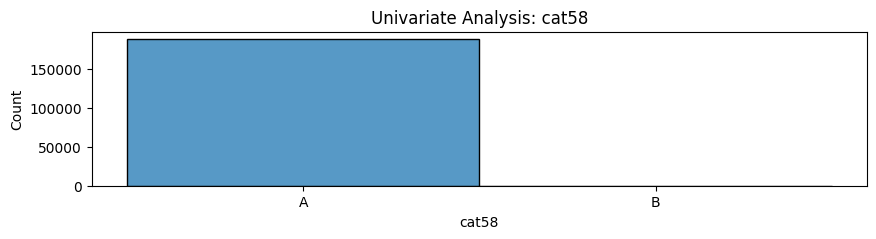

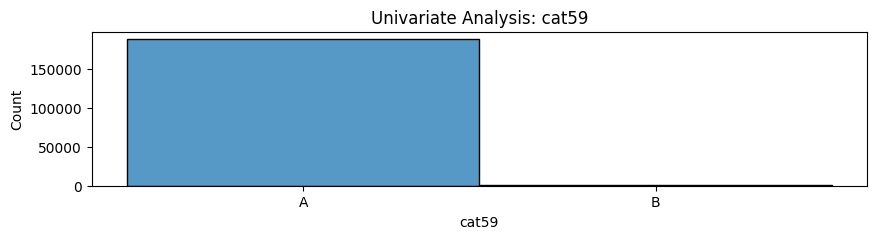

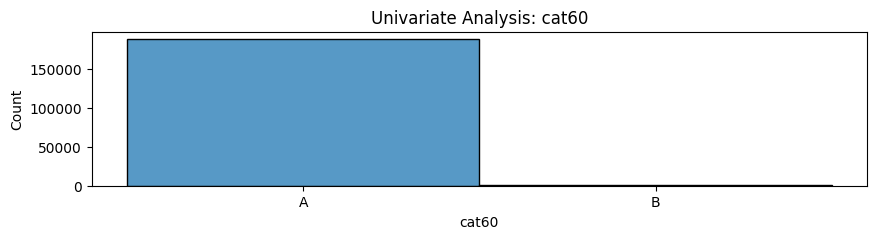

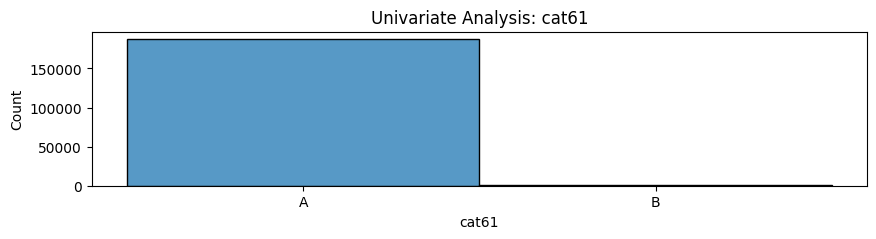

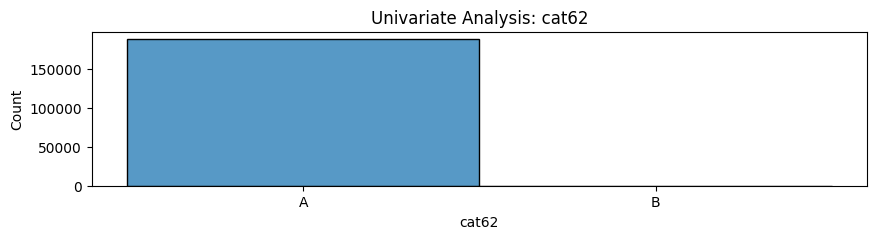

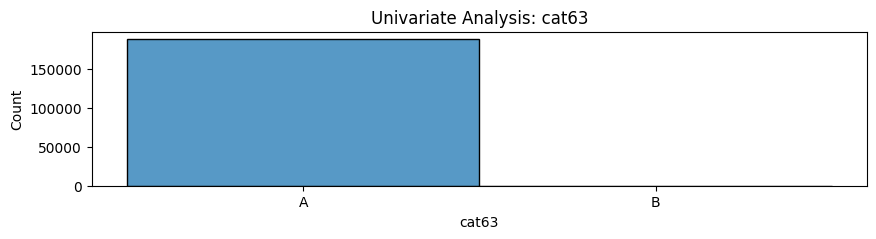

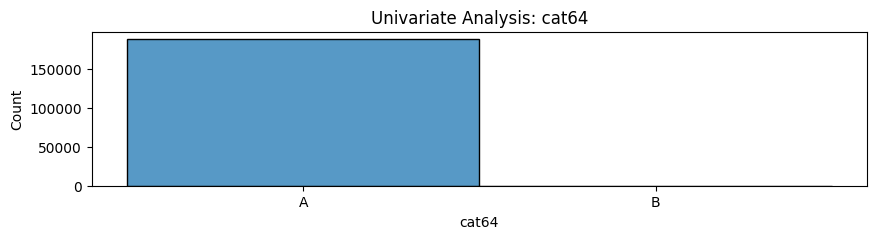

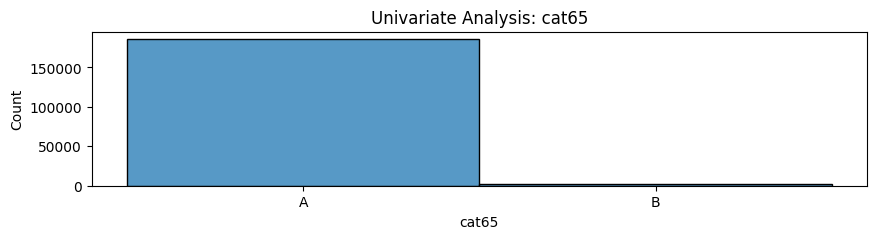

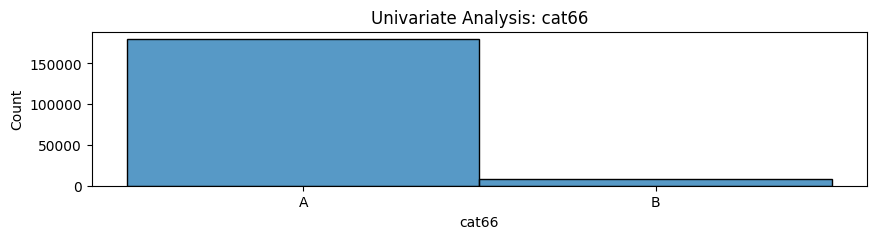

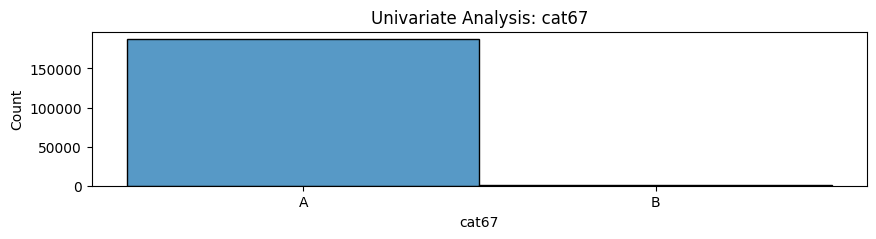

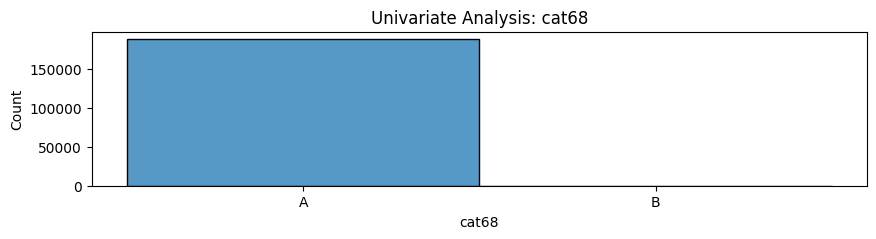

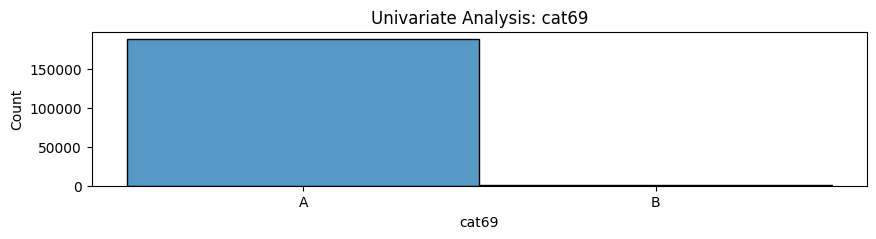

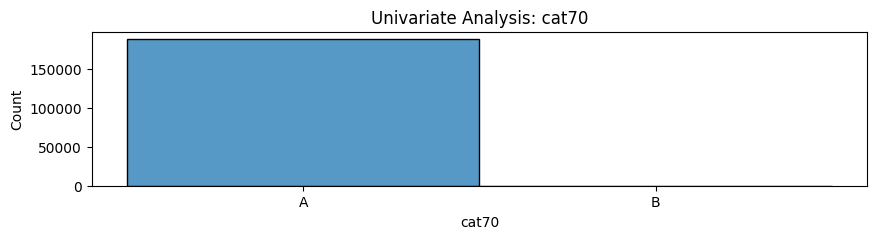

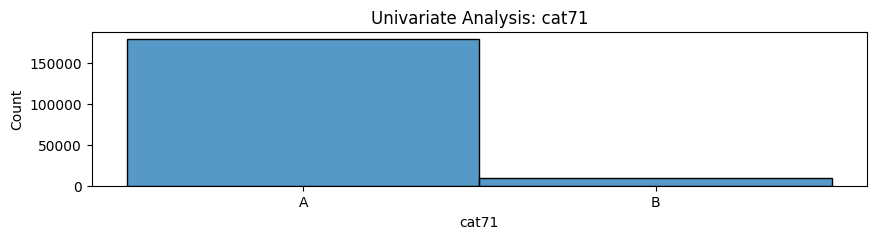

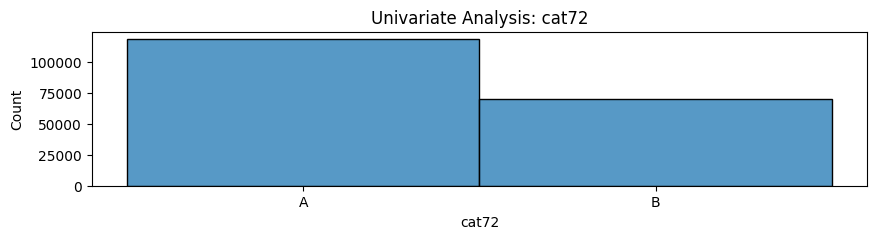

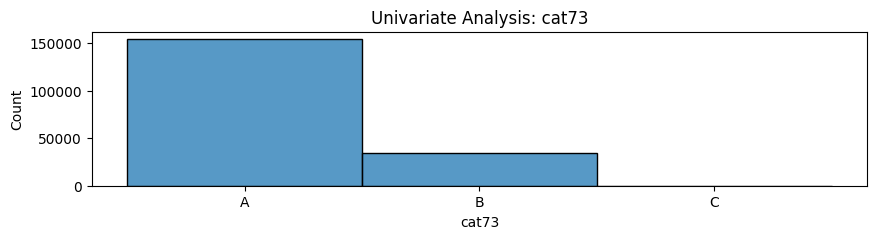

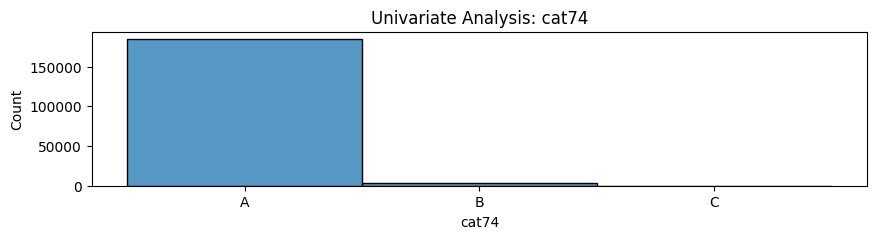

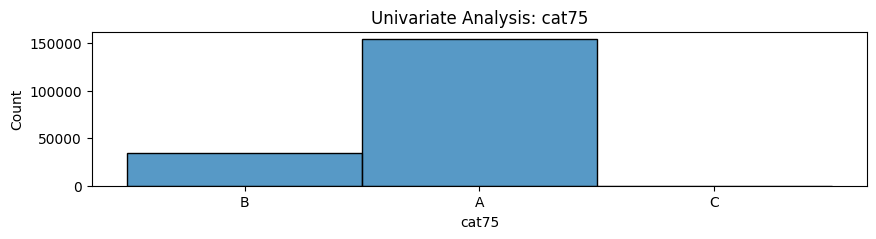

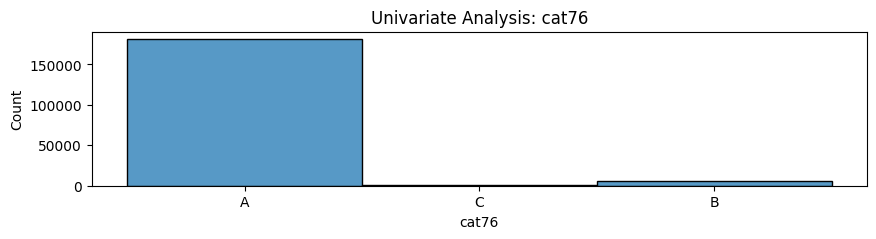

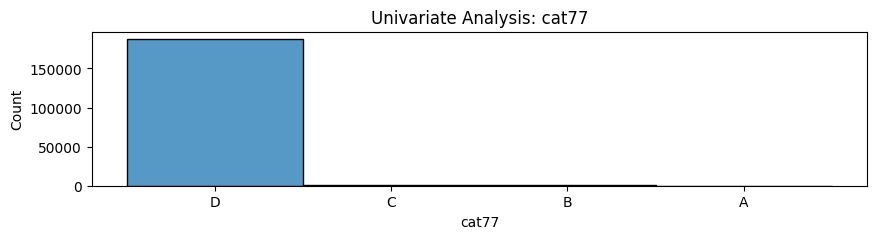

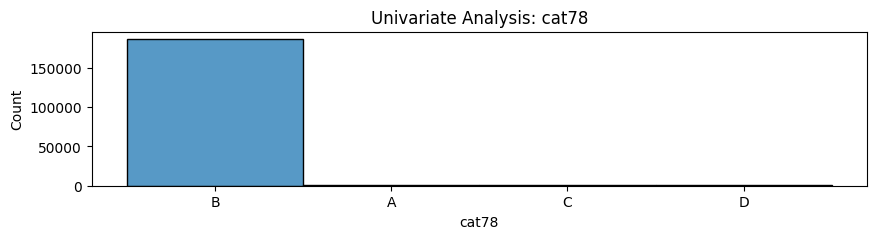

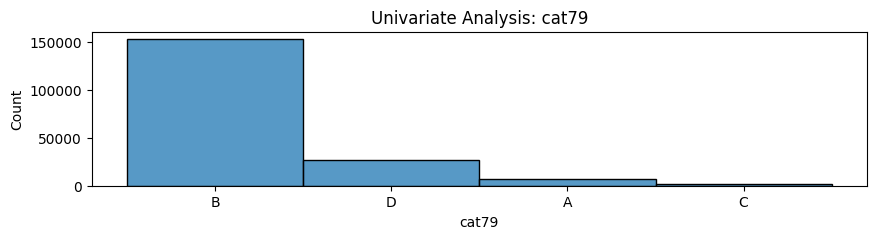

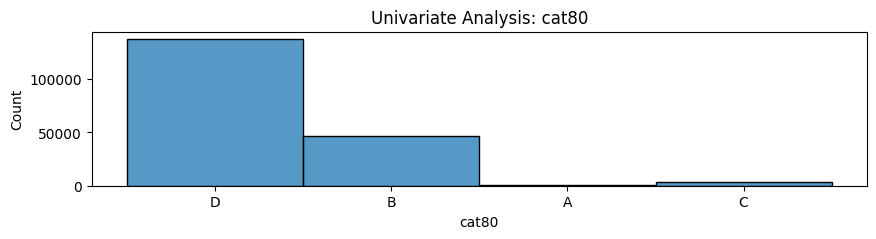

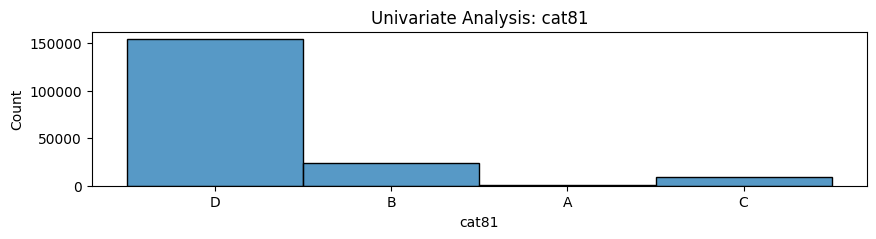

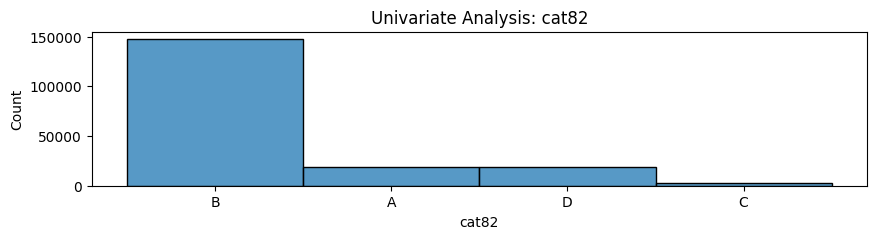

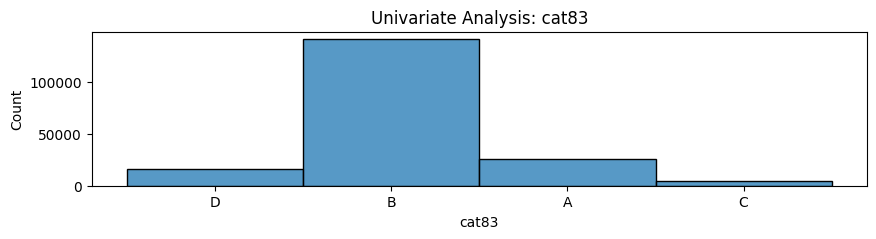

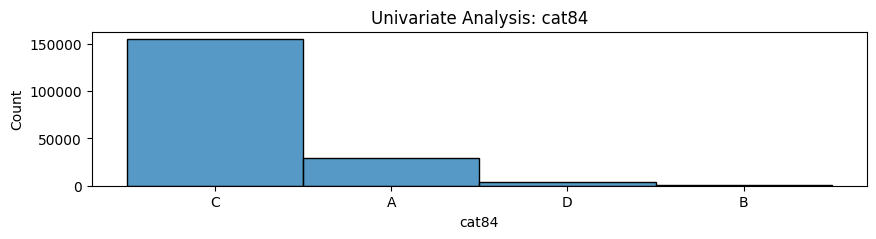

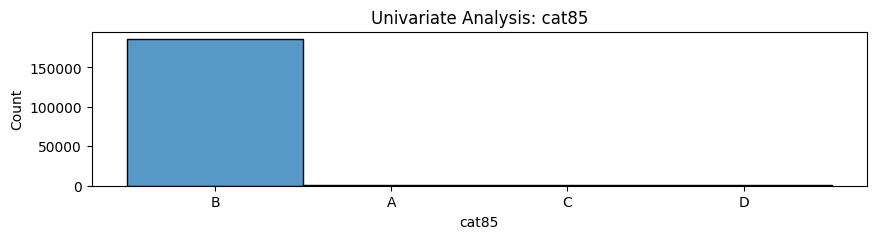

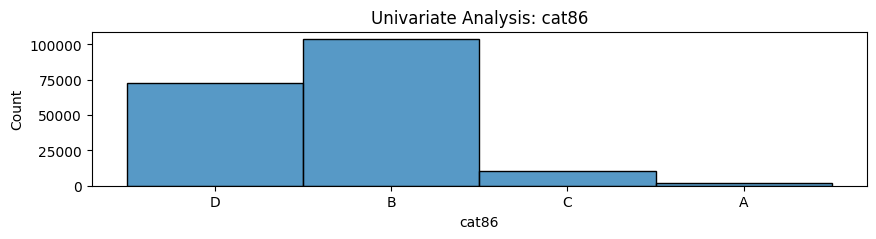

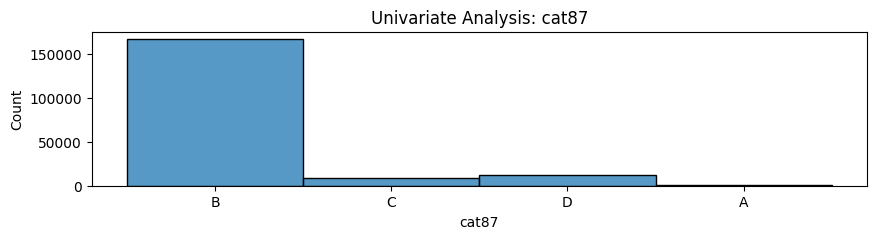

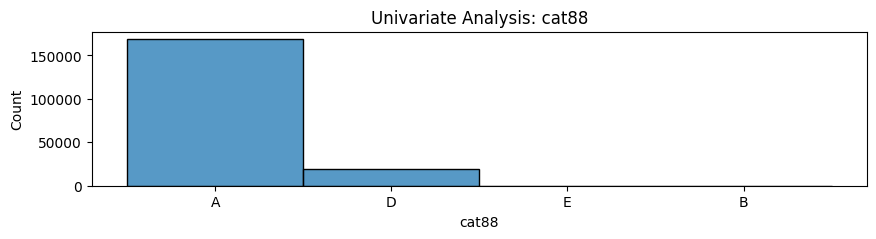

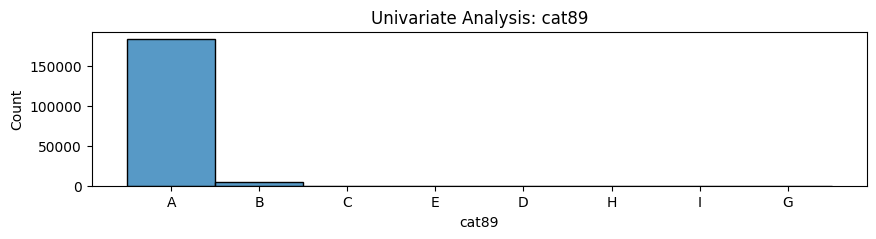

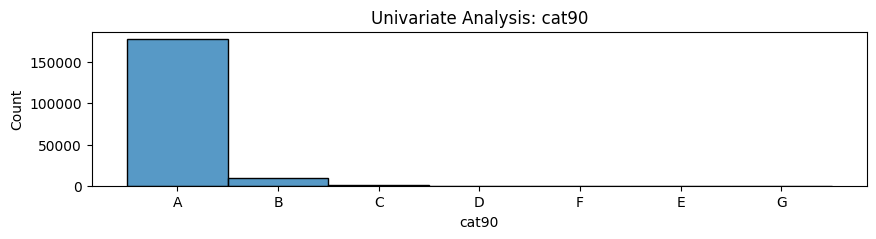

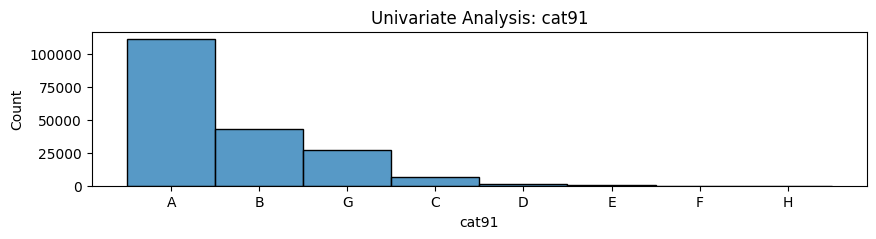

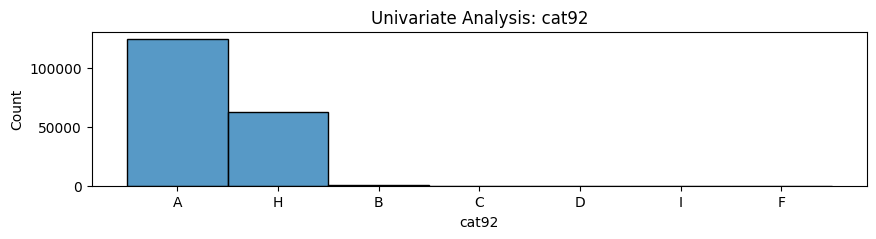

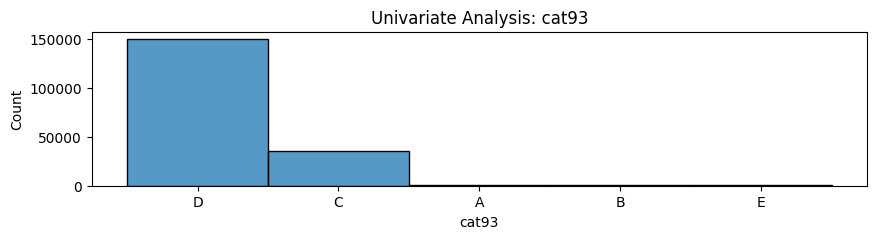

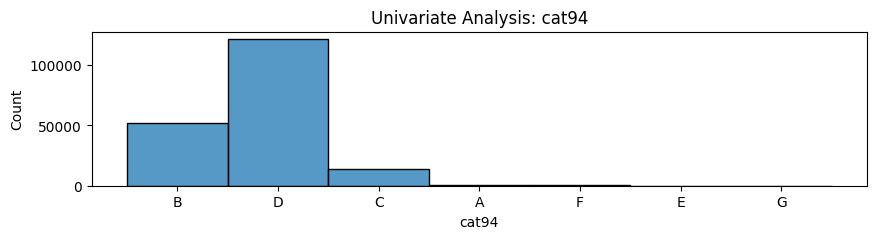

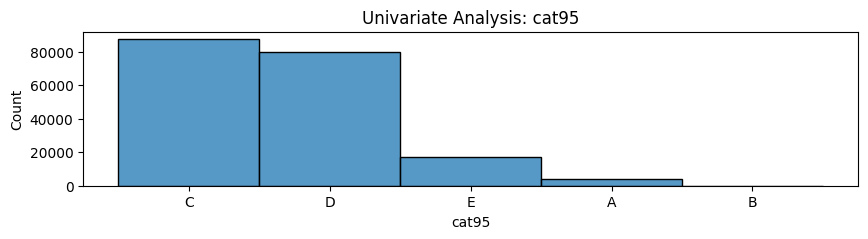

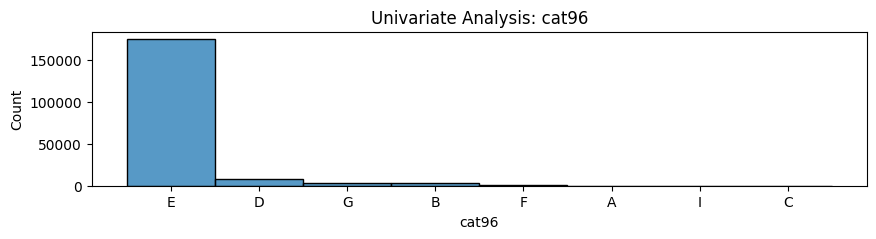

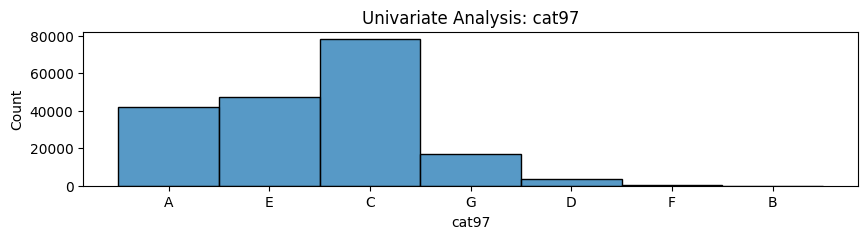

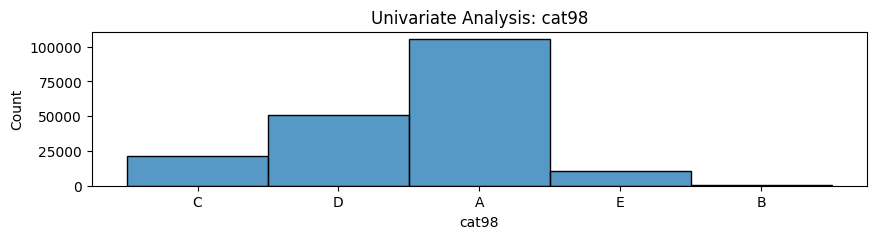

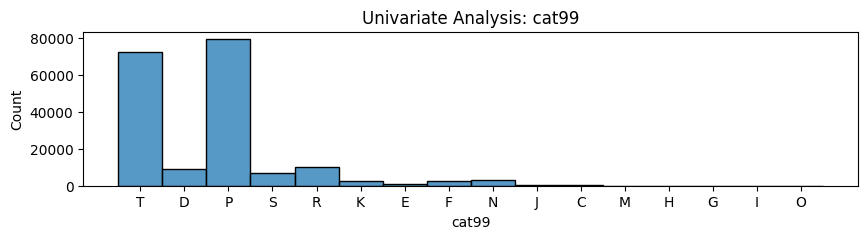

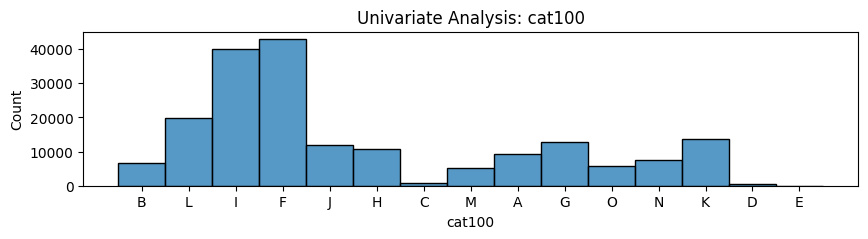

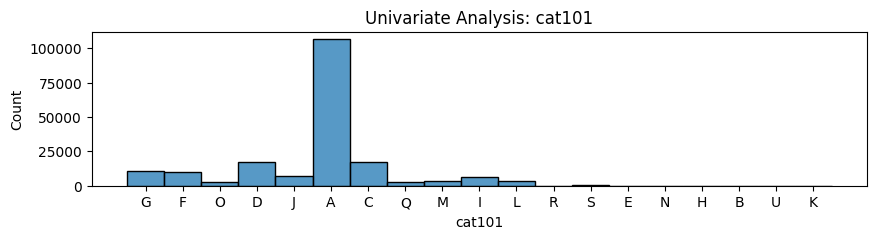

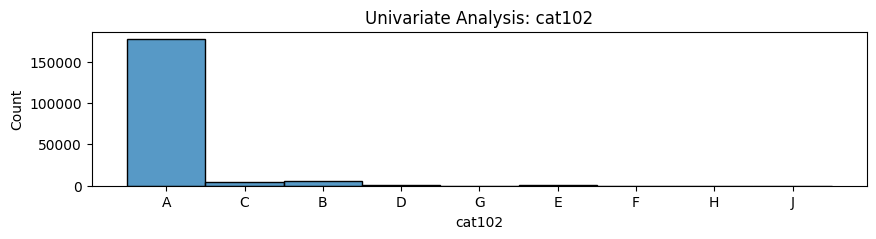

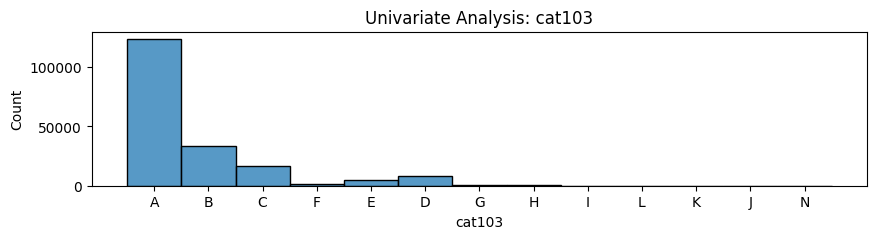

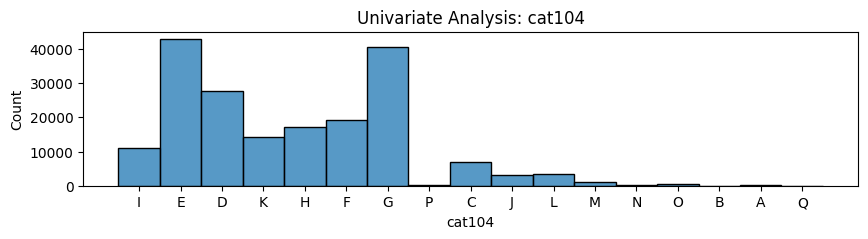

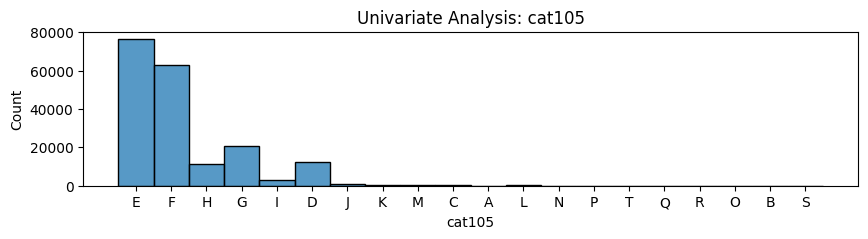

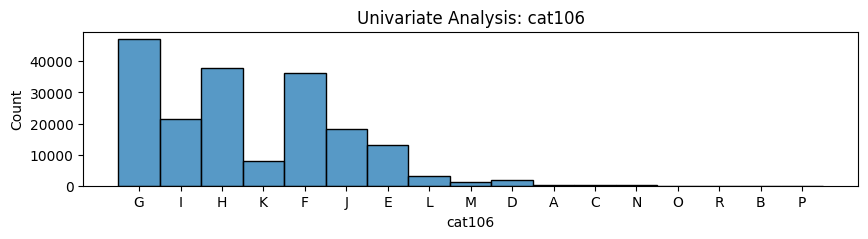

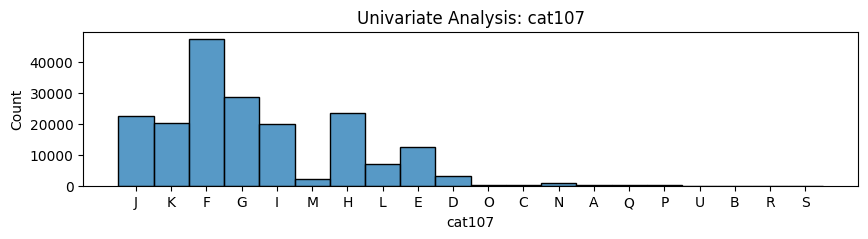

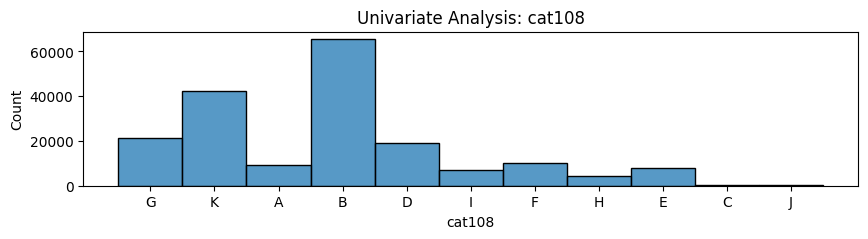

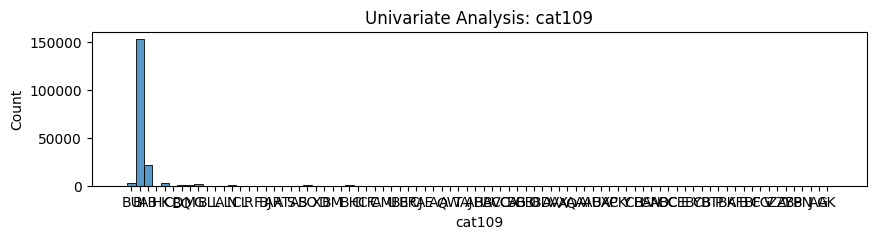

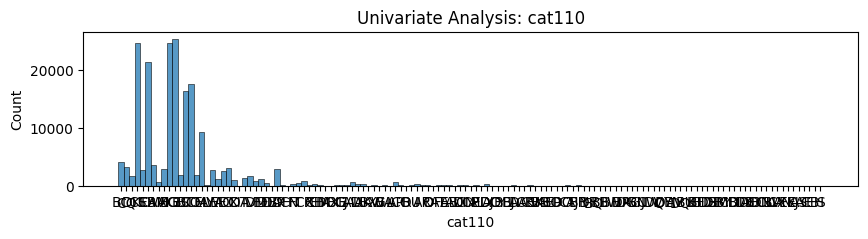

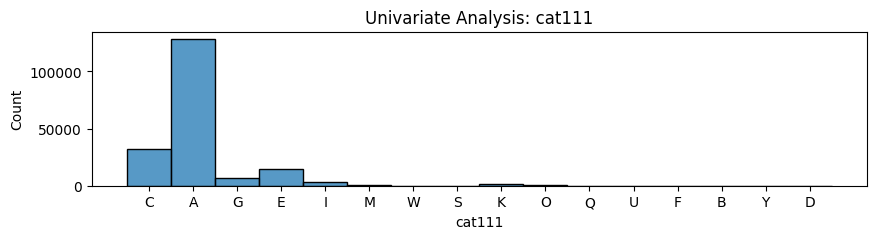

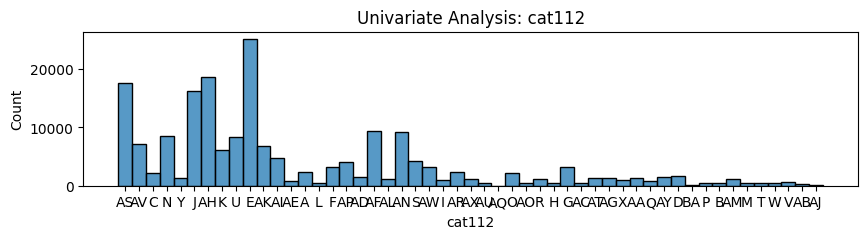

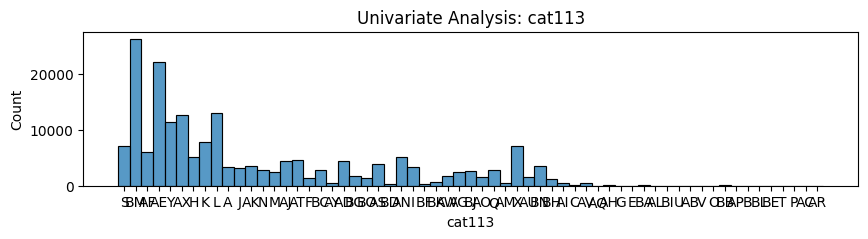

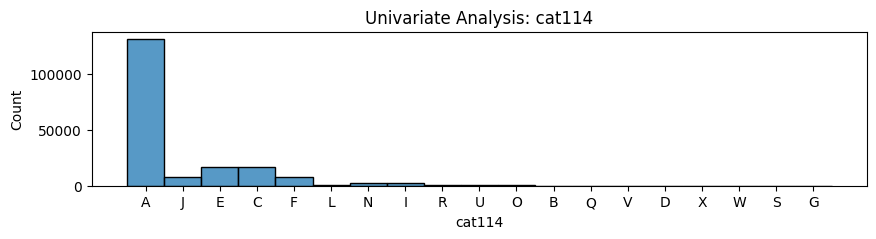

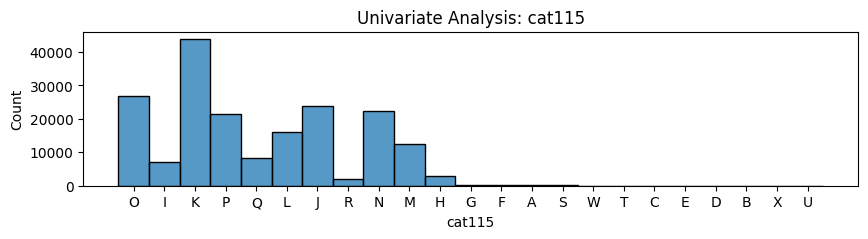

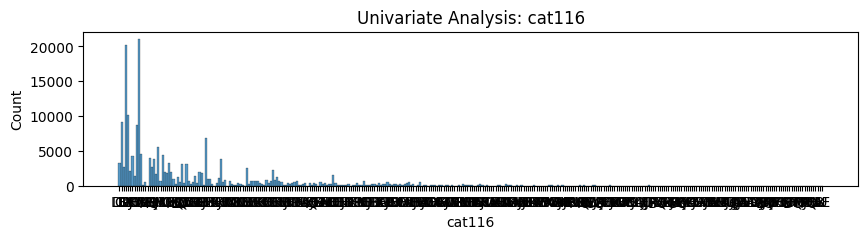

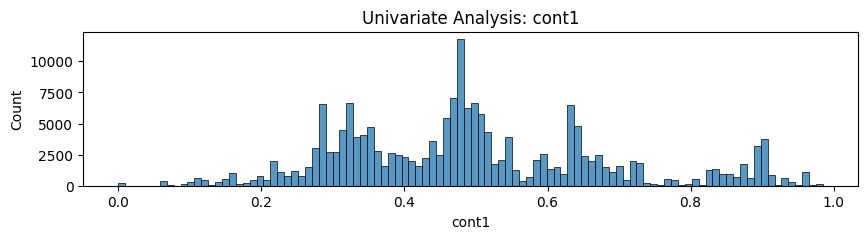

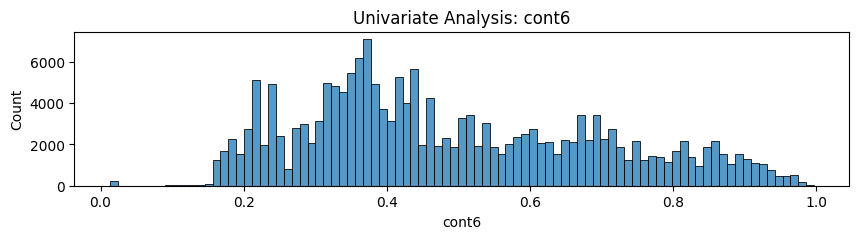

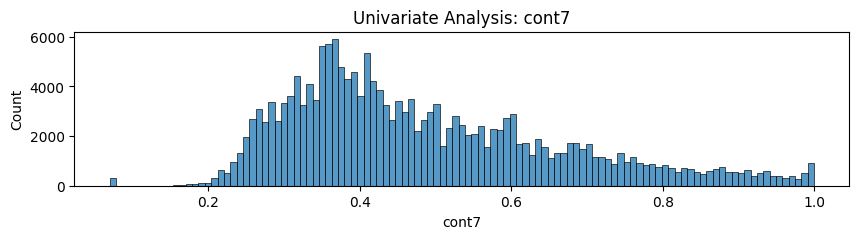

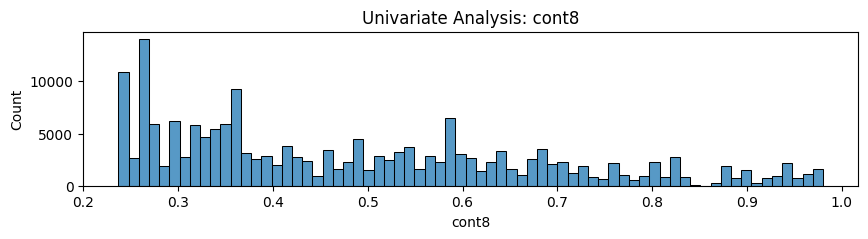

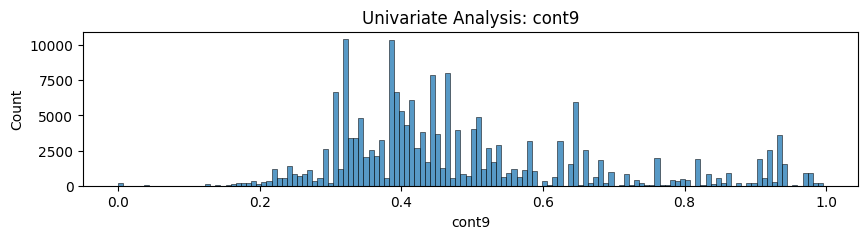

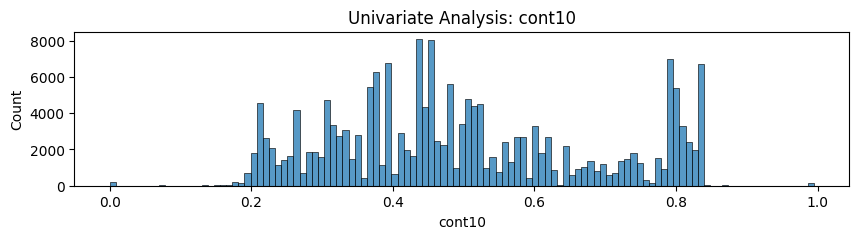

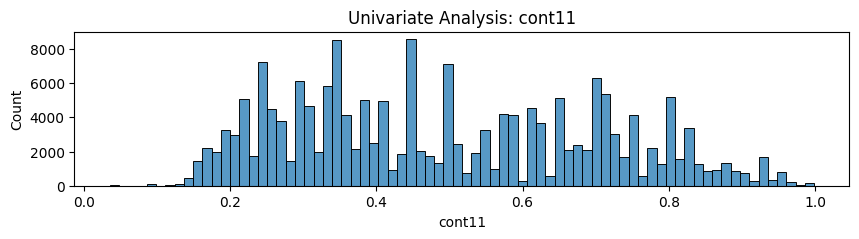

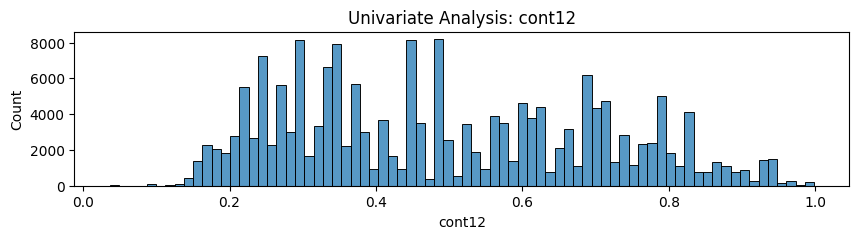

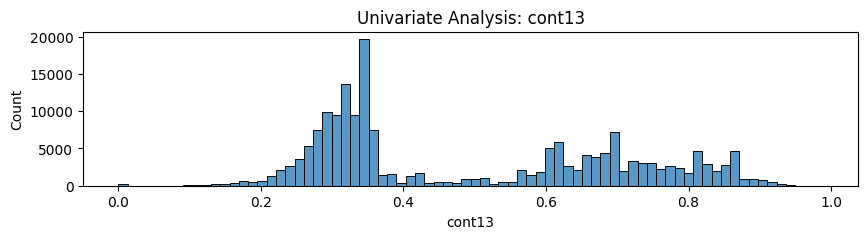

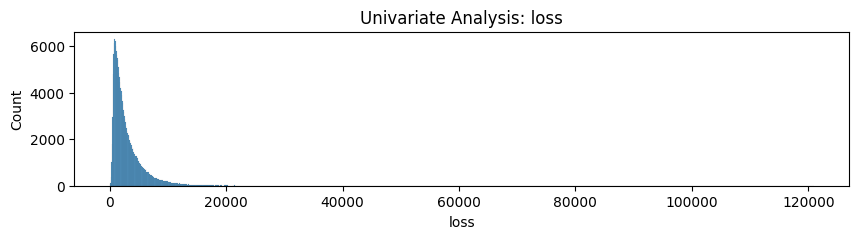

In [54]:
for column in a.columns:
    plt.figure(figsize=(10,2))
    sns.histplot(a[column])
    plt.title(f'Univariate Analysis: {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


Next we can do a simple checking of correlation between columns.

<ipython-input-22-d4ad2d46f5b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=a.corr()


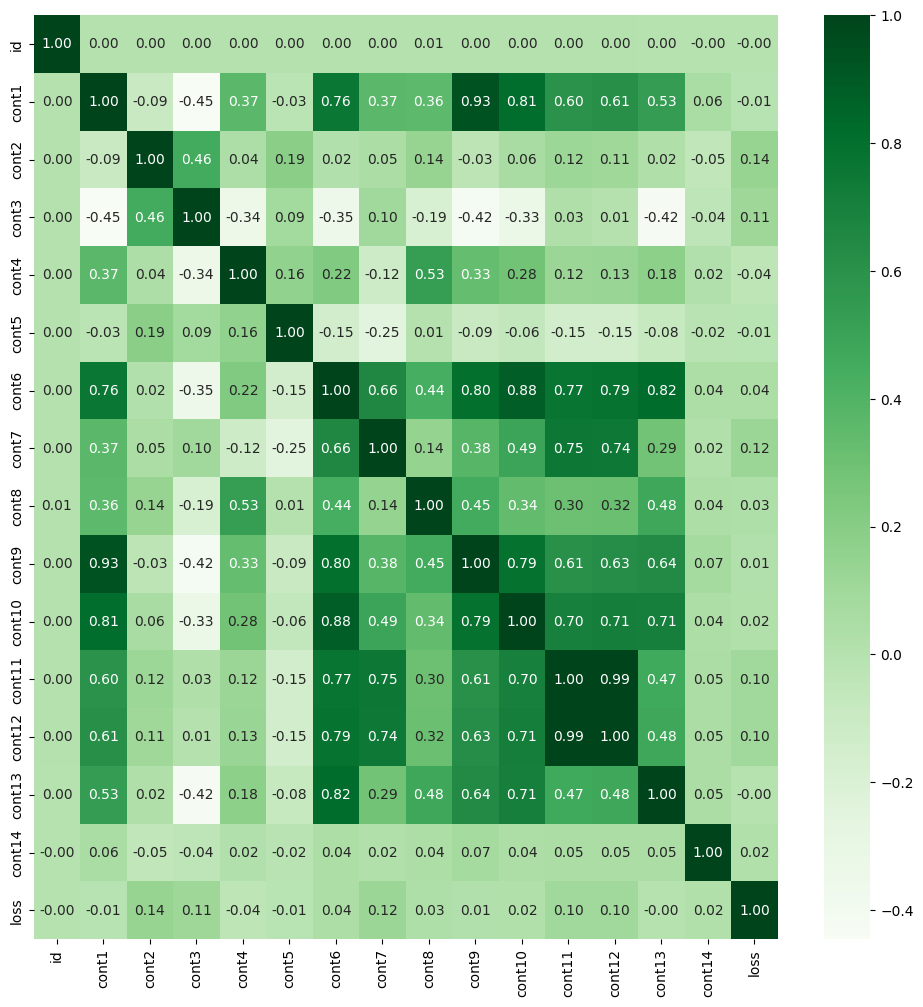

In [22]:
corr_df=a.corr()

plt.figure(figsize = (12,12))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

<ipython-input-23-68723afd9bbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=b.corr()


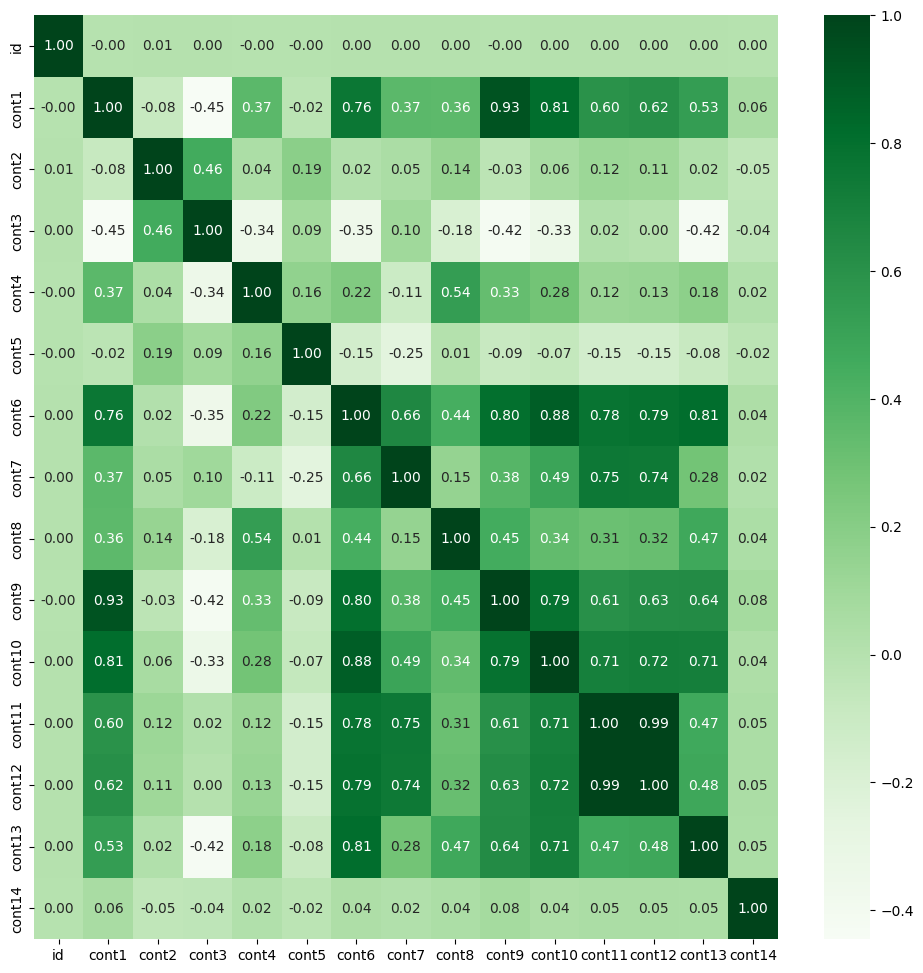

In [23]:
corr_df=b.corr()

plt.figure(figsize = (12,12))
sns.heatmap(data = corr_df, annot = True, cmap = "Greens", cbar = True, fmt='.2f')
plt.show()

## Deleting some less correlated columns

cont2,cont3,cont4,cont5,cont14 are lesser correlated columns

In [38]:
a.drop(['cont2', 'cont3', 'cont4', 'cont5', 'cont14'], axis=1, inplace=True)

In [39]:
b.drop(['cont2', 'cont3', 'cont4', 'cont5', 'cont14'], axis=1, inplace=True)

Test Data Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

columns_to_exclude = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'cont15', 'cont16']

c = a.copy()
columns_to_encode = [col for col in a.columns if col not in columns_to_exclude]
c[columns_to_encode] = a[columns_to_encode].apply(LabelEncoder().fit_transform)


Train Data Label Encoding

In [41]:
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

columns_to_exclude = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'cont15', 'cont16','loss']

d = b.copy()
columns_to_encode = [col for col in a.columns if col not in columns_to_exclude]
d[columns_to_encode] = b[columns_to_encode].apply(LabelEncoder().fit_transform)


## Scaling

In [42]:
scaler=StandardScaler()
e=pd.DataFrame(scaler.fit_transform(c),columns=c.columns)

In [43]:
scaler=StandardScaler()
f=pd.DataFrame(scaler.fit_transform(d),columns=d.columns)

## Train/Test /x/y split


In [44]:
Train_Data=e
Train_Data

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont1,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,loss
0,-1.732042,-0.574804,1.143636,-0.240848,1.463785,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,1.238750,1.107908,-0.840070,-0.922092,1.023032,1.813218,0.363476,0.484637,1.547892,0.010364
1,-1.732023,-0.574804,1.143636,-0.240848,-0.683160,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,-0.870537,-0.253457,-0.271142,0.573972,-0.738944,-0.316748,-0.739973,-0.605672,0.555951,-0.791407
2,-1.732005,-0.574804,1.143636,-0.240848,-0.683160,1.384195,-0.655727,-0.157776,-0.249598,1.226524,...,-1.236521,-0.980633,-0.949428,-1.069556,-1.237183,-0.933986,-0.534544,-0.571688,-1.397844,0.485193
3,-1.731986,1.739725,1.143636,-0.240848,1.463785,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,-0.918075,-0.243577,-0.525875,-0.845049,-0.904033,-0.287266,-0.789545,-0.819289,0.526089,-1.148170
4,-1.731968,-0.574804,1.143636,-0.240848,1.463785,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,-1.175963,-1.523596,-1.331256,-1.207792,-1.456660,-1.537399,-1.377084,-1.389213,-1.161437,0.358089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,1.731968,-0.574804,1.143636,-0.240848,-0.683160,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,-0.780530,-1.210625,-1.092864,-1.207792,-0.973889,-0.907678,-1.289588,-1.304267,-0.751237,-0.877213
188314,1.731986,-0.574804,-0.874404,-0.240848,-0.683160,-0.722441,1.525026,-0.157776,-0.249598,-0.815312,...,0.073543,-0.763253,-0.577027,0.743907,-0.445648,-0.109083,-0.886272,-0.913112,-0.820069,-0.969046
188315,1.732005,-0.574804,1.143636,-0.240848,-0.683160,-0.722441,-0.655727,-0.157776,4.006446,1.226524,...,-0.050055,-0.706680,-0.641280,-1.207792,-0.150976,-0.109083,-0.228368,-0.237680,-0.723264,1.336237
188316,1.732023,-0.574804,1.143636,-0.240848,-0.683160,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,-0.295654,1.039691,0.436514,-0.684995,-0.208281,0.219200,1.761934,1.717621,0.759554,-0.520140


In [45]:
Test_Data=f
f

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat116,cont1,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,-1.732037,-0.578129,1.144662,-0.23919,-0.677788,-0.725122,-0.653018,-0.156463,-0.250879,1.228439,...,0.312664,-0.919627,-0.124516,-0.941866,0.625858,-0.781654,-0.638611,-0.554358,-0.590894,0.980571
1,-1.732009,-0.578129,1.144662,-0.23919,1.475389,-0.725122,-0.653018,-0.156463,-0.250879,1.228439,...,0.368527,0.746364,-0.047492,-0.236131,1.132050,0.180553,0.565214,0.925292,0.864759,-0.195290
2,-1.731982,-0.578129,1.144662,-0.23919,1.475389,1.379079,-0.653018,6.391296,-0.250879,1.228439,...,-1.335297,-1.083390,-1.361463,-0.896536,-0.951251,-0.781654,-1.041248,-1.183234,-1.200858,-1.109770
3,-1.731954,-0.578129,-0.873620,-0.23919,-0.677788,1.379079,-0.653018,-0.156463,-0.250879,-0.814041,...,-0.986153,-1.201452,-0.594719,-0.803751,-0.436589,-0.843587,-0.990105,-0.691512,-0.724068,0.456008
4,-1.731927,1.729718,-0.873620,-0.23919,-0.677788,-0.725122,1.531352,-0.156463,-0.250879,-0.814041,...,0.228869,0.316018,-0.453981,-0.526796,-1.255437,-0.267415,0.035767,-0.640633,-0.674678,-0.908232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,1.731927,-0.578129,-0.873620,-0.23919,1.475389,-0.725122,-0.653018,-0.156463,-0.250879,-0.814041,...,0.117143,-0.191446,-0.259135,1.847173,-0.465304,0.007603,-0.496099,0.266967,0.211473,-0.921376
125542,1.731954,-0.578129,-0.873620,-0.23919,-0.677788,1.379079,1.531352,-0.156463,3.985986,-0.814041,...,-0.902358,-1.012471,-0.706514,-0.341321,-0.053675,-1.254495,-1.236732,-0.807393,-0.674678,-0.023859
125543,1.731982,1.729718,1.144662,-0.23919,-0.677788,1.379079,-0.653018,-0.156463,-0.250879,1.228439,...,1.862864,2.155998,1.540911,0.143058,1.180610,2.516646,1.807973,2.085642,2.058494,1.656649
125544,1.732009,-0.578129,-0.873620,-0.23919,-0.677788,-0.725122,1.531352,-0.156463,3.985986,-0.814041,...,-0.986153,-0.878990,-0.584041,-0.545200,-0.849120,-0.904477,-0.694648,-0.887517,-0.914177,0.531064


In [46]:
X_train = Train_Data.drop(columns = ['loss'],axis = 0)
X_train

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cat116,cont1,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,-1.732042,-0.574804,1.143636,-0.240848,1.463785,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,1.578092,1.238750,1.107908,-0.840070,-0.922092,1.023032,1.813218,0.363476,0.484637,1.547892
1,-1.732023,-0.574804,1.143636,-0.240848,-0.683160,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,-0.909697,-0.870537,-0.253457,-0.271142,0.573972,-0.738944,-0.316748,-0.739973,-0.605672,0.555951
2,-1.732005,-0.574804,1.143636,-0.240848,-0.683160,1.384195,-0.655727,-0.157776,-0.249598,1.226524,...,0.009703,-1.236521,-0.980633,-0.949428,-1.069556,-1.237183,-0.933986,-0.534544,-0.571688,-1.397844
3,-1.731986,1.739725,1.143636,-0.240848,1.463785,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,-0.990821,-0.918075,-0.243577,-0.525875,-0.845049,-0.904033,-0.287266,-0.789545,-0.819289,0.526089
4,-1.731968,-0.574804,1.143636,-0.240848,1.463785,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,-1.315315,-1.175963,-1.523596,-1.331256,-1.207792,-1.456660,-1.537399,-1.377084,-1.389213,-1.161437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,1.731968,-0.574804,1.143636,-0.240848,-0.683160,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,-1.315315,-0.780530,-1.210625,-1.092864,-1.207792,-0.973889,-0.907678,-1.289588,-1.304267,-0.751237
188314,1.731986,-0.574804,-0.874404,-0.240848,-0.683160,-0.722441,1.525026,-0.157776,-0.249598,-0.815312,...,-1.044903,0.073543,-0.763253,-0.577027,0.743907,-0.445648,-0.109083,-0.886272,-0.913112,-0.820069
188315,1.732005,-0.574804,1.143636,-0.240848,-0.683160,-0.722441,-0.655727,-0.157776,4.006446,1.226524,...,-0.990821,-0.050055,-0.706680,-0.641280,-1.207792,-0.150976,-0.109083,-0.228368,-0.237680,-0.723264
188316,1.732023,-0.574804,1.143636,-0.240848,-0.683160,-0.722441,-0.655727,-0.157776,-0.249598,1.226524,...,1.929628,-0.295654,1.039691,0.436514,-0.684995,-0.208281,0.219200,1.761934,1.717621,0.759554


In [47]:
y_train = Train_Data['loss']
y_train

0         0.010364
1        -0.791407
2         0.485193
3        -1.148170
4         0.358089
            ...   
188313   -0.877213
188314   -0.969046
188315    1.336237
188316   -0.520140
188317    1.121421
Name: loss, Length: 188318, dtype: float64

## Machine Learning

Based on the problem statement, we can understand that we should do the analysis based on Regression based algorithms.

### Building the Algorithm

Linear Regression

In [48]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

Decision Tree Regression

In [49]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

## Making Predictions

Linear Regression

In [50]:
linear_pred = linear_reg.predict(Test_Data)

Decision Tree Regression

In [51]:
dt_pred =dt_reg.predict(Test_Data)

## Summary

As the Y test data is not given in the dataset, the evaluation of the model could not be performed to analyse and find out the accuracy of each model